In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use("ggplot")
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

In [ ]:
df = pd.read_csv("possession_2014_2015.csv")
df1 = pd.read_csv("moufia_2014_2015.csv")
df2 = pd.read_csv("saintandre_2014_2015.csv")
df3 = pd.read_csv("saintleu_2014_2015.csv")
df4 = pd.read_csv("saintpierre_2014_2015.csv")

In [ ]:


def plot_Flow():
    for csv in ["moufia_2014_2015", "possession_2014_2015", "saintandre_2014_2015", "saintleu_2014_2015", "saintpierre_2014_2015"]:
        df = pd.read_csv(csv+'.csv', delimiter=',')
        df[['Date','Time']]=df.Timestamp.str.split(" ", expand=True)
        df.plot(subplots=True, figsize=(12,8))
        df.plot(x="Timestamp",y=["FG_Avg"], title ="Flux direct moyens en (W/m2) : " + csv.split('_')[0]  +" entre 2014 et 2015")
#        plt.figure(figsize=(8,4), dpi=100)
#         plt.plot(x=df["FG_Avg"],y=df["Date"], label = csv)
#         plt.legend()
#         plt.title("Flux direct moyens au pas des heures en (W/m2) 2014 entre 2015")
#         plt.xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2015-12-31'))

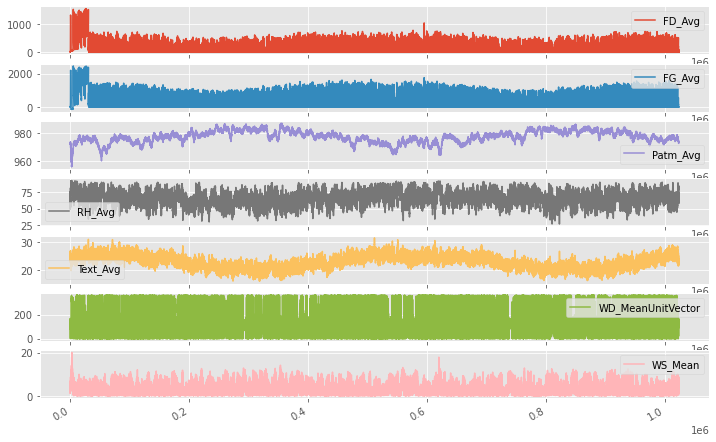

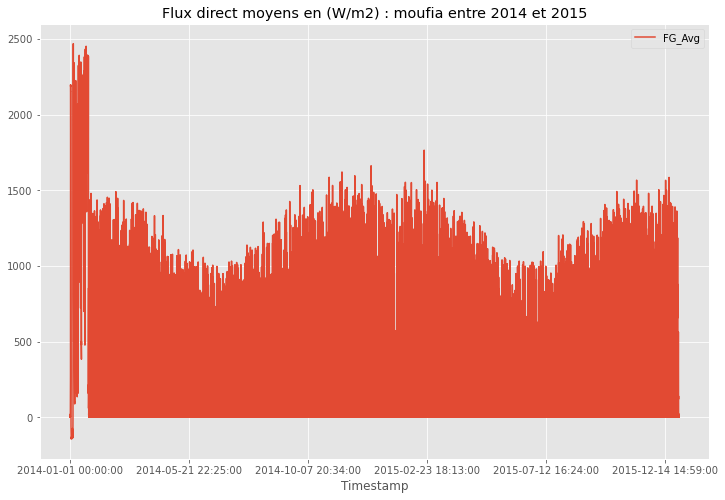

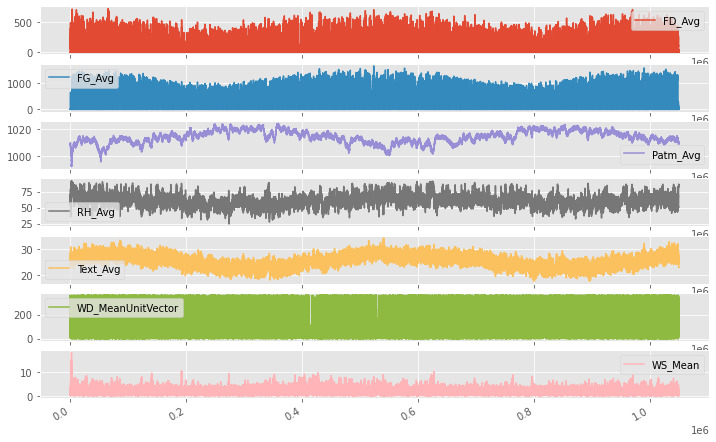

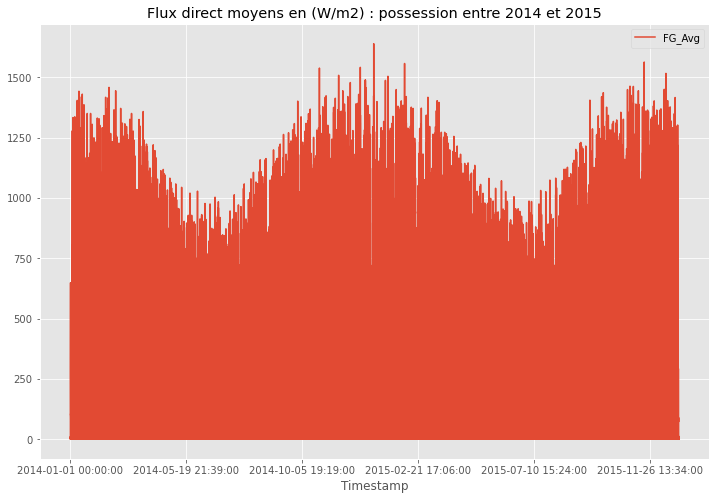

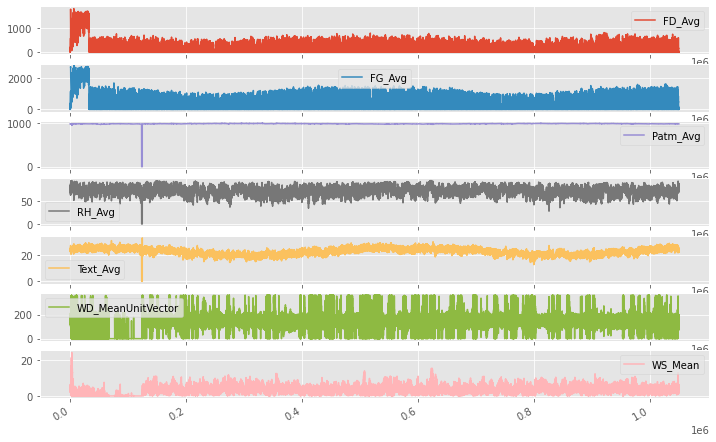

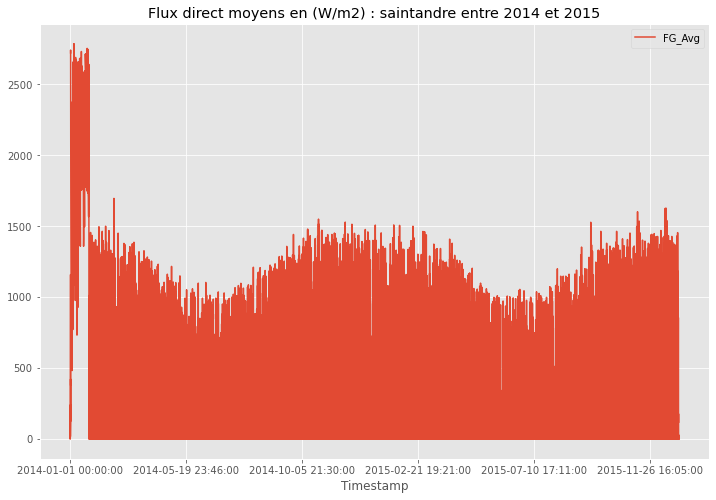

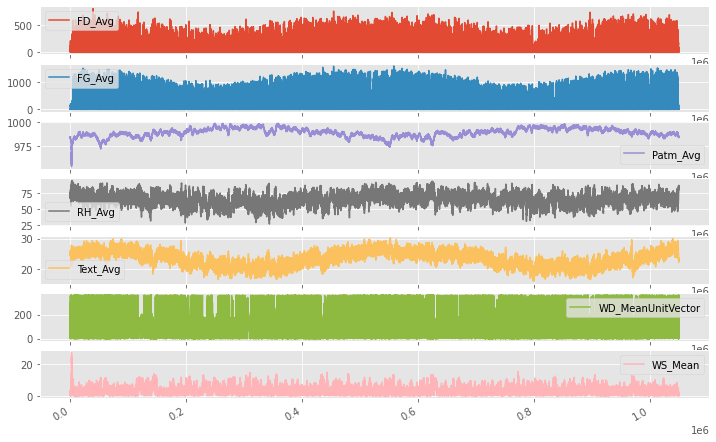

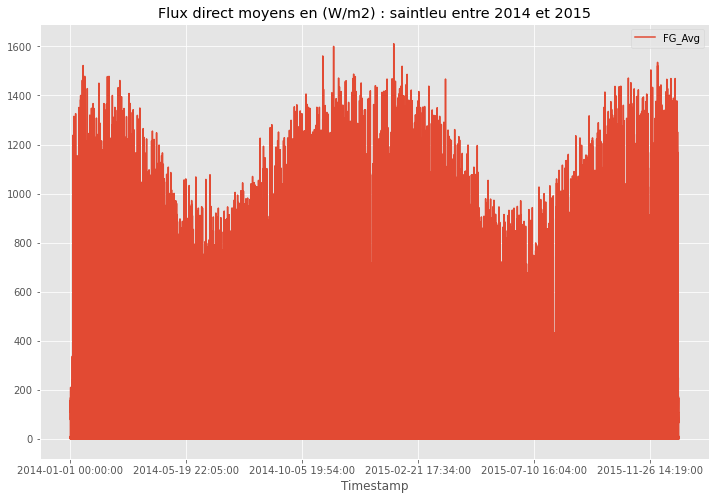

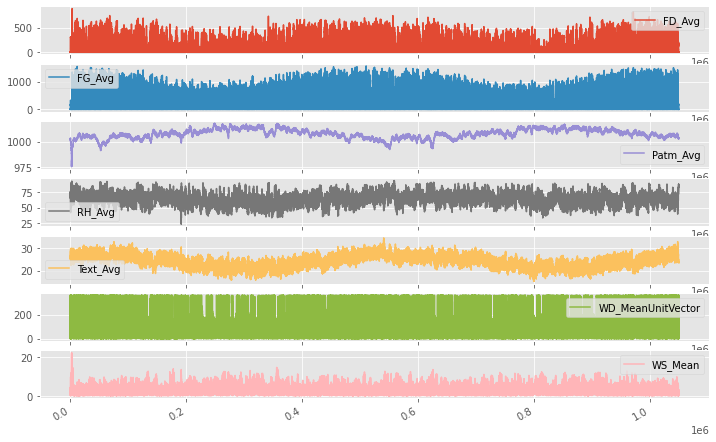

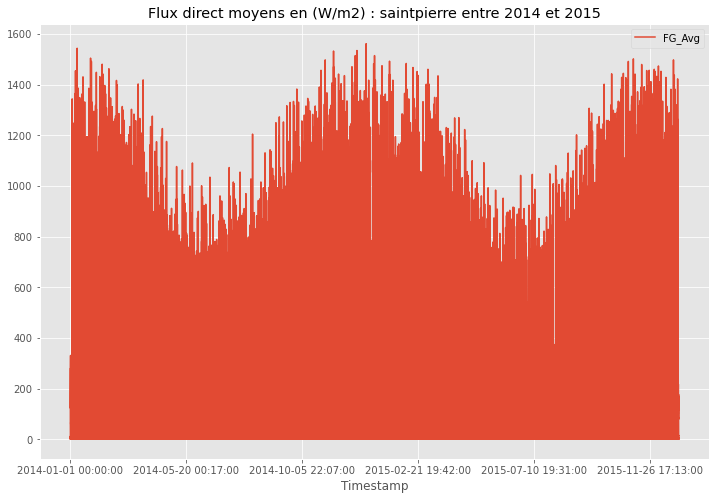

In [ ]:
plot_Flow()

In [ ]:
#d = datetime(2015, 1, 1, 0, 0,0)
#d_stamp=df[df["Timestamp"]<d ]

#fig = px.line(d_stamp, x='Timestamp', y="FG_Avg")
#fig.show()

# Importation des données météorologiques

In [ ]:
df = pd.read_csv("possession_2014_2015.csv")
df1 = pd.read_csv("moufia_2014_2015.csv")
df2 = pd.read_csv("saintandre_2014_2015.csv")
df3 = pd.read_csv("saintleu_2014_2015.csv")
df4 = pd.read_csv("saintpierre_2014_2015.csv")

# EXPLORATION Des données

In [ ]:
df.head()

,Timestamp,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean
0,2014-01-01 00:00:00,3.298,1.565,1009.600,62.36666,26.7,139.3986,1.316667
1,2014-01-01 00:01:00,3.466,3.913,1009.600,62.26666,26.7,132.1638,2.200000
2,2014-01-01 00:02:00,0.839,1.453,1009.600,62.03333,26.7,123.2599,1.866667
3,2014-01-01 00:03:00,3.354,1.621,1009.600,61.78333,26.7,122.6728,2.066667
4,2014-01-01 00:04:00,0.894,3.857,1009.533,61.56667,26.7,132.4675,2.116667


In [ ]:
##### y'a des valeurs nulls 
min(df["Patm_Avg"])  

992.4

In [ ]:
max(df["FG_Avg"])

1639.0

In [ ]:
max(df["FD_Avg"])

726.6

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049582 entries, 0 to 1049581
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Timestamp          1049582 non-null  object 
 1   FD_Avg             1049582 non-null  float64
 2   FG_Avg             1049582 non-null  float64
 3   Patm_Avg           1049582 non-null  float64
 4   RH_Avg             1049582 non-null  float64
 5   Text_Avg           1049582 non-null  float64
 6   WD_MeanUnitVector  1049582 non-null  float64
 7   WS_Mean            1049582 non-null  float64
dtypes: float64(7), object(1)
memory usage: 64.1+ MB


# Premiers prétraitements des données : on cacule le flux direct et l'indice de fraction Kb

In [ ]:
df["Kb"]=(df["FG_Avg"]-df["FD_Avg"])/df["FG_Avg"]

In [ ]:
df1["Kb"]=(df1["FG_Avg"]-df1["FD_Avg"])/df1["FG_Avg"]
df2["Kb"]=(df2["FG_Avg"]-df2["FD_Avg"])/df2["FG_Avg"]
df3["Kb"]=(df3["FG_Avg"]-df3["FD_Avg"])/df3["FG_Avg"]
df4["Kb"]=(df4["FG_Avg"]-df4["FD_Avg"])/df4["FG_Avg"]

# Visulaisation en hsitogrammes

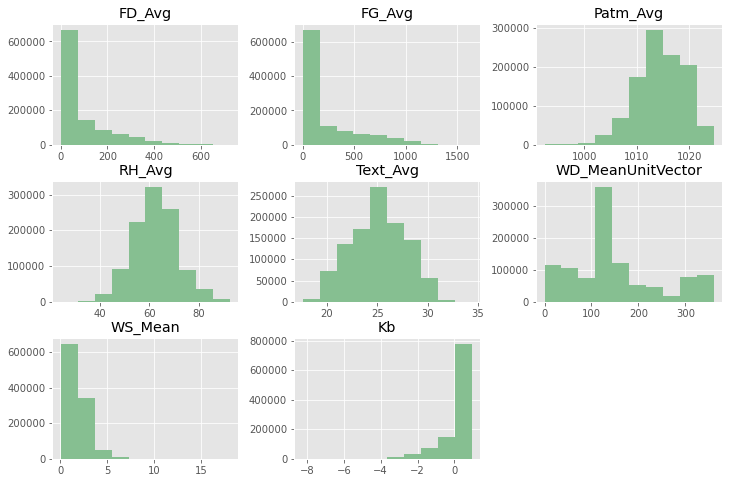

In [ ]:
df.hist(color='#86bf91')
plt.savefig('hist.png')

In [ ]:
min(df["Kb"])

-8.241773962804006

Nous remarquons l'existances de valeurs négatives qui sortent de l'intervalle [0,1]

In [ ]:
df

,Timestamp,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,Kb
0,2014-01-01 00:00:00,3.298,1.565,1009.600,62.36666,26.70000,139.39860,1.316667,-1.107348
1,2014-01-01 00:01:00,3.466,3.913,1009.600,62.26666,26.70000,132.16380,2.200000,0.114235
2,2014-01-01 00:02:00,0.839,1.453,1009.600,62.03333,26.70000,123.25990,1.866667,0.422574
3,2014-01-01 00:03:00,3.354,1.621,1009.600,61.78333,26.70000,122.67280,2.066667,-1.069093
4,2014-01-01 00:04:00,0.894,3.857,1009.533,61.56667,26.70000,132.46750,2.116667,0.768214
...,...,...,...,...,...,...,...,...,...
1049577,2015-12-30 23:56:00,5.762,4.028,1010.000,85.05000,22.90000,118.23870,1.266667,-0.430487
1049578,2015-12-30 23:57:00,3.244,4.139,1010.000,85.16666,22.90000,102.99080,1.500000,0.216236
1049579,2015-12-30 23:58:00,3.300,1.566,1009.967,85.16666,22.91666,109.99880,1.500000,-1.107280
1049580,2015-12-30 23:59:00,3.244,3.860,1009.900,85.13333,22.90000,100.68010,1.283333,0.159585


In [ ]:
max(df["Kb"])

0.9471653543307087

In [ ]:
max(df1["Kb"])

397.83098591549305

In [ ]:
df=df[df["Kb"]>=0]###### On enlève les valeurs aberrante

In [ ]:
df1=df1[df1["Kb"]>=0]
df2=df2[df2["Kb"]>=0]
df3=df3[df3["Kb"]>=0]
df4=df4[df4["Kb"]>=0]

In [ ]:
df1=df1[df1["Kb"]<=1]
df2=df2[df2["Kb"]<=1]
df3=df3[df3["Kb"]<=1]
df4=df4[df4["Kb"]<=1]

In [ ]:
min(df["Kb"])

0.0

In [ ]:
df.info()##### On vérifie

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818071 entries, 1 to 1049580
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Timestamp          818071 non-null  object 
 1   FD_Avg             818071 non-null  float64
 2   FG_Avg             818071 non-null  float64
 3   Patm_Avg           818071 non-null  float64
 4   RH_Avg             818071 non-null  float64
 5   Text_Avg           818071 non-null  float64
 6   WD_MeanUnitVector  818071 non-null  float64
 7   WS_Mean            818071 non-null  float64
 8   Kb                 818071 non-null  float64
dtypes: float64(8), object(1)
memory usage: 62.4+ MB


Les valeurs de Kb qui ne sont pas entre 0 et 1 ont été enlevé ce qui a représenté environ 22%  de la base de données  : 
(1- (818071 / 1049582)= 1- 0.77942552368 = 0.22057447631)

In [ ]:
### La valeur maximal de 1400 est dépassé on a encore des valeurs extrêmes!!
###  Ces valeurs extrêmes seraients supprimer

In [ ]:
max(df["FG_Avg"]) 

1639.0

In [ ]:
df=df[df["FG_Avg"]<=1400]
df1=df1[df1["FG_Avg"]<=1400]
df2=df2[df2["FG_Avg"]<=1400]
df3=df3[df3["FG_Avg"]<=1400]
df4=df4[df4["FG_Avg"]<=1400]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817956 entries, 1 to 1049580
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Timestamp          817956 non-null  object 
 1   FD_Avg             817956 non-null  float64
 2   FG_Avg             817956 non-null  float64
 3   Patm_Avg           817956 non-null  float64
 4   RH_Avg             817956 non-null  float64
 5   Text_Avg           817956 non-null  float64
 6   WD_MeanUnitVector  817956 non-null  float64
 7   WS_Mean            817956 non-null  float64
 8   Kb                 817956 non-null  float64
dtypes: float64(8), object(1)
memory usage: 62.4+ MB


On reste au alentours de 22% supprimés

In [ ]:
max(df["FG_Avg"])

1400.0

### Analyse statistique des boîtes à moustaches

In [ ]:
#plt.boxplot(box_plot_data)

import time
from datetime import datetime


d = datetime(2015, 1, 1, 0, 0,0)

df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y%m%d %H:%M:%S')
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'], format='%Y%m%d %H:%M:%S')
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'], format='%Y%m%d %H:%M:%S')
df3['Timestamp'] = pd.to_datetime(df3['Timestamp'], format='%Y%m%d %H:%M:%S')
df4['Timestamp'] = pd.to_datetime(df4['Timestamp'], format='%Y%m%d %H:%M:%S')



d = datetime(2015, 1, 1, 0,0)
P_2014=df[df["Timestamp"]<d ]
P_2015=df[df["Timestamp"]>=d]

M_2014=df1[df1["Timestamp"]<d ]
M_2015=df1[df1["Timestamp"]>=d]


SA_2014=df2[df2["Timestamp"]<d ]
SA_2015=df2[df2["Timestamp"]>=d]


SL_2014=df3[df3["Timestamp"]<d ]
SL_2015=df3[df3["Timestamp"]>=d]

SP_2014=df4[df4["Timestamp"]<d ]
SP_2015=df4[df4["Timestamp"]>=d]

In [ ]:
#### Boîtes à moustaches des plt

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb 
import numpy as np 

def box_plot(data, edge_color, fill_color, labels,boxtitle):
    bp = ax.boxplot(data,labels = labels, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)
        plt.title(boxtitle)
        

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

In [ ]:
box_plot_data=[P_2014["Kb"],P_2015["Kb"],M_2014["Kb"],M_2015["Kb"],SA_2014["Kb"],SA_2015["Kb"],SL_2014["Kb"],SL_2015["Kb"],SP_2014["Kb"],SP_2015["Kb"]]
labels=['P_14','P_15','M_14','M_15','SA_14','SA_15','SL_14','SL_15','SP_14','SP_15']

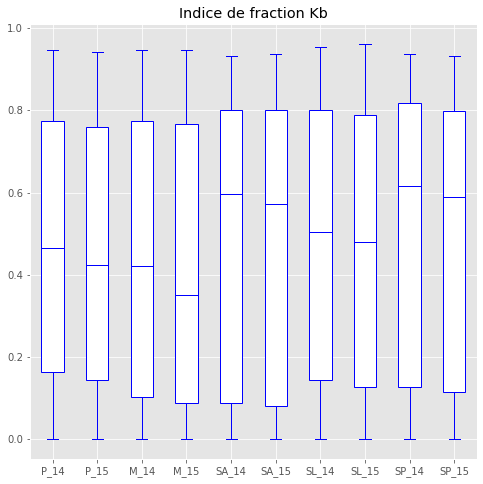

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
box_plot(box_plot_data, 'blue', 'white',labels,'Indice de fraction Kb')

#### Boites à moustaches pour la pression atmosphérique

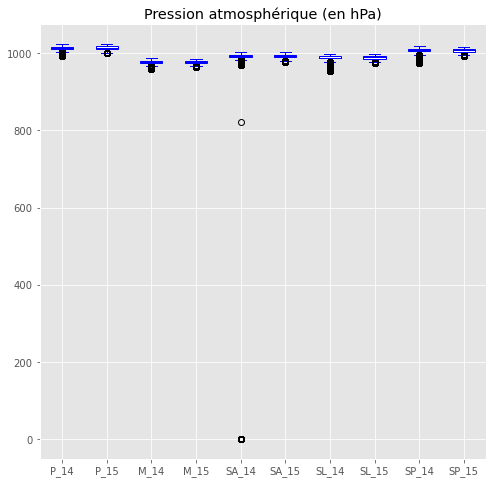

In [ ]:
box_plot_data=[P_2014["Patm_Avg"],P_2015["Patm_Avg"],M_2014["Patm_Avg"],M_2015["Patm_Avg"],SA_2014["Patm_Avg"],SA_2015["Patm_Avg"],SL_2014["Patm_Avg"],SL_2015["Patm_Avg"],SP_2014["Patm_Avg"],SP_2015["Patm_Avg"]]

fig, ax = plt.subplots(figsize=(8, 8))
box_plot(box_plot_data, 'blue', 'white',labels,'Pression atmosphérique (en hPa)')

In [ ]:
####On a des valeurs valeurs pour la pression atmorsphérique: elle ne peut pas être nulle


In [ ]:
Q1 = P_2014['Patm_Avg'].quantile(0.25)
Q3 = P_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (P_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (P_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

P_2014 = P_2014.loc[filter1]  


Q1 = P_2015['Patm_Avg'].quantile(0.25)
Q3 = P_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (P_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (P_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
P_2015 = P_2015.loc[filter2]


###### MOUFIA SUPPRESSION DES OUTLIERS




Q1 = M_2014['Patm_Avg'].quantile(0.25)
Q3 = M_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (M_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (M_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

M_2014 = M_2014.loc[filter1]  


Q1 = M_2015['Patm_Avg'].quantile(0.25)
Q3 = M_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (M_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (M_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
M_2015 = M_2015.loc[filter2]




###### SAINT ANDRE SUPPRESSION DES OUTLIERS






Q1 = SA_2014['Patm_Avg'].quantile(0.25)
Q3 = SA_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SA_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SA_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

SA_2014 = SA_2014.loc[filter1]  


Q1 = SA_2015['Patm_Avg'].quantile(0.25)
Q3 = SA_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SA_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SA_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
SA_2015 = SA_2015.loc[filter2]




###### SAINT LE SUPPRESSION DES OUTLIERS


Q1 = SL_2014['Patm_Avg'].quantile(0.25)
Q3 = SL_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SL_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SL_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

SL_2014 = SL_2014.loc[filter1]  


Q1 = SL_2015['Patm_Avg'].quantile(0.25)
Q3 = SL_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SL_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SL_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
SL_2015 = SL_2015.loc[filter2]



###### SAINT PIERRE SUPPRESSION DES OUTLIERS




Q1 = SP_2014['Patm_Avg'].quantile(0.25)
Q3 = SP_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SP_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SP_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

SP_2014 = SP_2014.loc[filter1]  


Q1 = SP_2015['Patm_Avg'].quantile(0.25)
Q3 = SP_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SP_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SP_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
SP_2015 = SP_2015.loc[filter2]



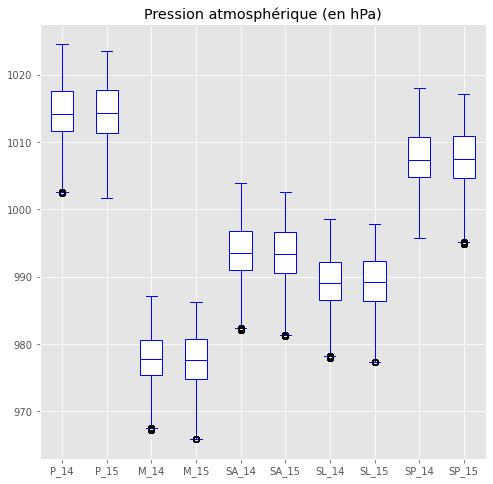

In [ ]:
box_plot_data=[P_2014["Patm_Avg"],P_2015["Patm_Avg"],M_2014["Patm_Avg"],M_2015["Patm_Avg"],SA_2014["Patm_Avg"],SA_2015["Patm_Avg"],SL_2014["Patm_Avg"],SL_2015["Patm_Avg"],SP_2014["Patm_Avg"],SP_2015["Patm_Avg"]]
fig, ax = plt.subplots(figsize=(8, 8))
box_plot(box_plot_data, 'blue', 'white',labels,'Pression atmosphérique (en hPa)')

#### Boîtes à moustaches en fonctio de la vitesse du vent WS

In [ ]:
box_plot_data=[P_2014["FD_Avg"],P_2015["FD_Avg"],M_2014["FD_Avg"],M_2015["FD_Avg"],SA_2014["FD_Avg"],SA_2015["FD_Avg"],SL_2014["FD_Avg"],SL_2015["FD_Avg"],SP_2014["FD_Avg"],SP_2015["FD_Avg"]]

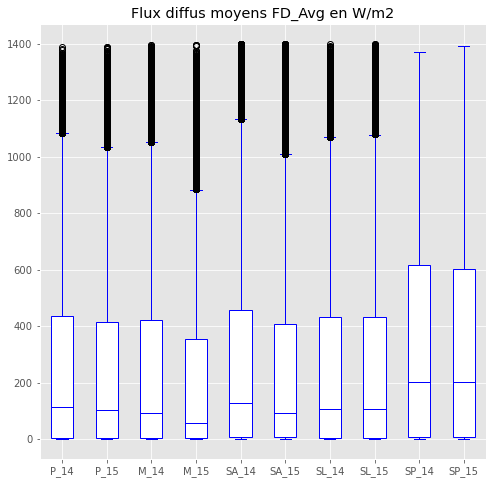

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
box_plot(box_plot_data, 'blue', 'white',labels,'Flux diffus moyens FD_Avg en W/m2')

In [ ]:
Q1 = P_2014['FD_Avg'].quantile(0.25)
Q3 = P_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (P_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (P_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

P_2014 = P_2014.loc[filter1]  


Q1 = P_2015['FD_Avg'].quantile(0.25)
Q3 = P_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (P_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (P_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
P_2015 = P_2015.loc[filter2]


###### MOUFIA SUPPRESSION DES OUTLIERS




Q1 = M_2014['FD_Avg'].quantile(0.25)
Q3 = M_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (M_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (M_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

M_2014 = M_2014.loc[filter1]  


Q1 = M_2015['FD_Avg'].quantile(0.25)
Q3 = M_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (M_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (M_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
M_2015 = M_2015.loc[filter2]




###### SAINT ANDRE SUPPRESSION DES OUTLIERS






Q1 = SA_2014['FD_Avg'].quantile(0.25)
Q3 = SA_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SA_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (SA_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

SA_2014 = SA_2014.loc[filter1]  


Q1 = SA_2015['FD_Avg'].quantile(0.25)
Q3 = SA_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SA_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (SA_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
SA_2015 = SA_2015.loc[filter2]




###### SAINT LE SUPPRESSION DES OUTLIERS


Q1 = SL_2014['FD_Avg'].quantile(0.25)
Q3 = SL_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SL_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (SL_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

SL_2014 = SL_2014.loc[filter1]  


Q1 = SL_2015['FD_Avg'].quantile(0.25)
Q3 = SL_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SL_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (SL_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
SL_2015 = SL_2015.loc[filter2]



###### SAINT PIERRE SUPPRESSION DES OUTLIERS




Q1 = SP_2014['FD_Avg'].quantile(0.25)
Q3 = SP_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SP_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (SP_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

SP_2014 = SP_2014.loc[filter1]  


Q1 = SP_2015['FD_Avg'].quantile(0.25)
Q3 = SP_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SP_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (SP_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
SP_2015 = SP_2015.loc[filter2]

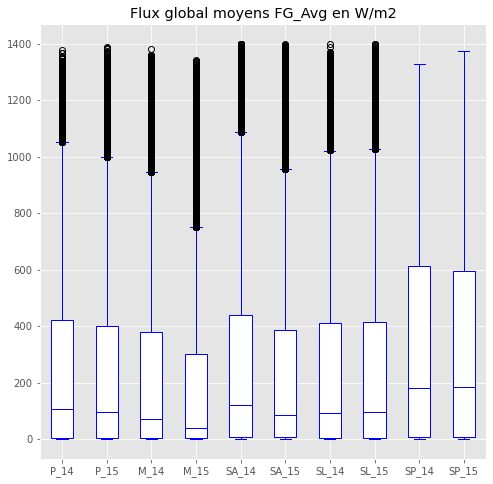

In [ ]:
box_plot_data=[P_2014["FG_Avg"],P_2015["FG_Avg"],M_2014["FG_Avg"],M_2015["FG_Avg"],SA_2014["FG_Avg"],SA_2015["FG_Avg"],SL_2014["FG_Avg"],SL_2015["FG_Avg"],SP_2014["FG_Avg"],SP_2015["FG_Avg"]]
fig, ax = plt.subplots(figsize=(8, 8))
box_plot(box_plot_data, 'blue', 'white',labels,'Flux global moyens FG_Avg en W/m2')

In [ ]:
# Comparaison statistique

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb 
import numpy as np 

def box_plot2(data, edge_color, fill_color, labels,boxtitle):
    bp = ax.boxplot(data,labels = labels, patch_artist=True, showfliers= False)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)
        plt.title(boxtitle)
        

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

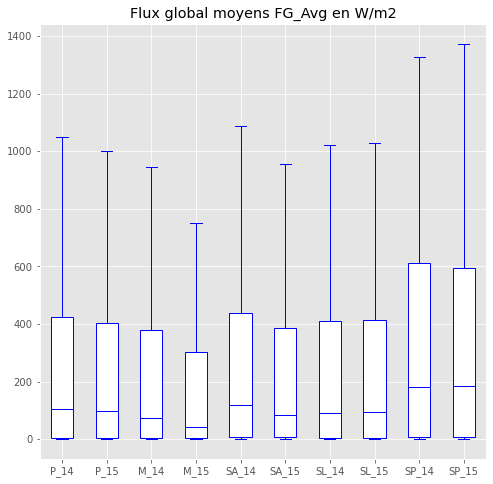

In [ ]:
box_plot_data=[P_2014["FG_Avg"],P_2015["FG_Avg"],M_2014["FG_Avg"],M_2015["FG_Avg"],SA_2014["FG_Avg"],SA_2015["FG_Avg"],SL_2014["FG_Avg"],SL_2015["FG_Avg"],SP_2014["FG_Avg"],SP_2015["FG_Avg"]]
fig, ax = plt.subplots(figsize=(8, 8))
box_plot2(box_plot_data, 'blue', 'white',labels,'Flux global moyens FG_Avg en W/m2')

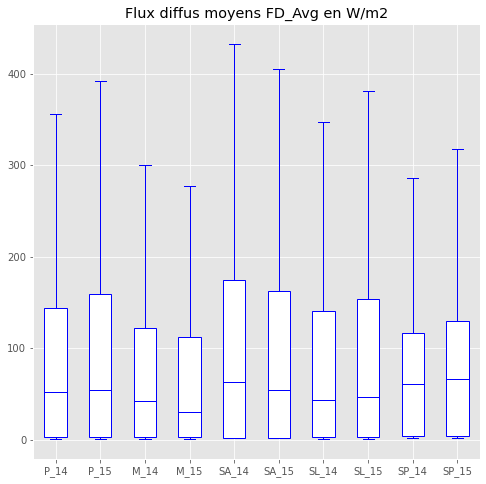

In [ ]:
box_plot_data=[P_2014["FD_Avg"],P_2015["FD_Avg"],M_2014["FD_Avg"],M_2015["FD_Avg"],SA_2014["FD_Avg"],SA_2015["FD_Avg"],SL_2014["FD_Avg"],SL_2015["FD_Avg"],SP_2014["FD_Avg"],SP_2015["FD_Avg"]]
fig, ax = plt.subplots(figsize=(8, 8))
box_plot2(box_plot_data, 'blue', 'white',labels,'Flux diffus moyens FD_Avg en W/m2')

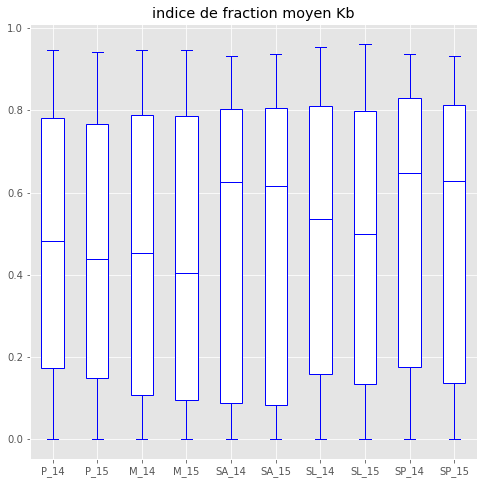

In [ ]:
box_plot_data=[P_2014["Kb"],P_2015["Kb"],M_2014["Kb"],M_2015["Kb"],SA_2014["Kb"],SA_2015["Kb"],SL_2014["Kb"],SL_2015["Kb"],SP_2014["Kb"],SP_2015["Kb"]]
fig, ax = plt.subplots(figsize=(8, 8))
box_plot2(box_plot_data, 'blue', 'white',labels,'indice de fraction moyen Kb')

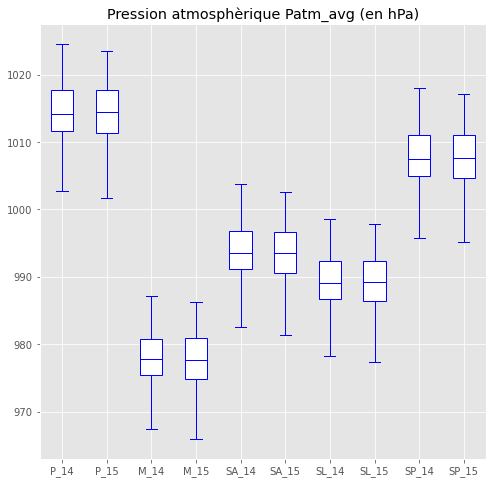

In [ ]:
box_plot_data=[P_2014["Patm_Avg"],P_2015["Patm_Avg"],M_2014["Patm_Avg"],M_2015["Patm_Avg"],SA_2014["Patm_Avg"],SA_2015["Patm_Avg"],SL_2014["Patm_Avg"],SL_2015["Patm_Avg"],SP_2014["Patm_Avg"],SP_2015["Patm_Avg"]]
fig, ax = plt.subplots(figsize=(8, 8))
box_plot2(box_plot_data, 'blue', 'white',labels,'Pression atmosphèrique Patm_avg (en hPa)')

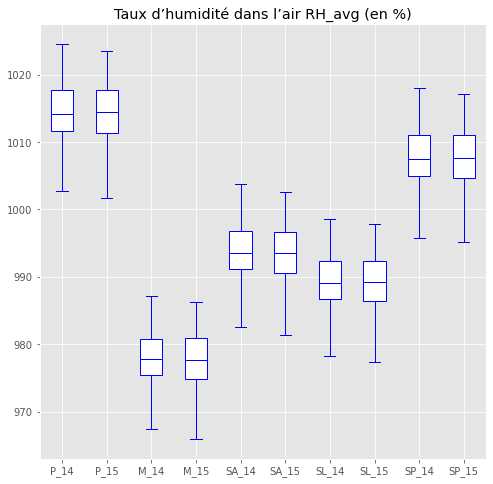

In [ ]:
box_plot_data=[P_2014["Patm_Avg"],P_2015["Patm_Avg"],M_2014["Patm_Avg"],M_2015["Patm_Avg"],SA_2014["Patm_Avg"],SA_2015["Patm_Avg"],SL_2014["Patm_Avg"],SL_2015["Patm_Avg"],SP_2014["Patm_Avg"],SP_2015["Patm_Avg"]]
fig, ax = plt.subplots(figsize=(8, 8))
box_plot2(box_plot_data, 'blue', 'white',labels,'Taux d’humidité dans l’air RH_avg (en %)')

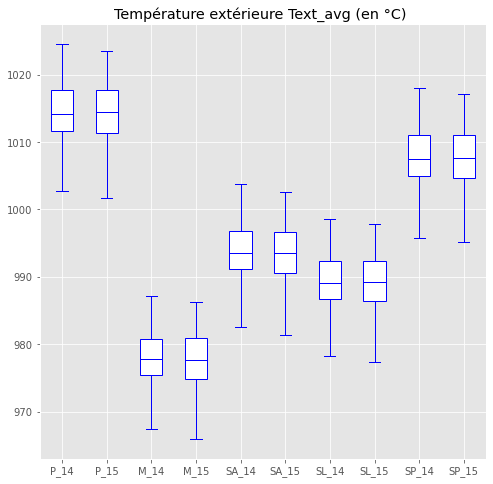

In [ ]:
box_plot_data=[P_2014["Patm_Avg"],P_2015["Patm_Avg"],M_2014["Patm_Avg"],M_2015["Patm_Avg"],SA_2014["Patm_Avg"],SA_2015["Patm_Avg"],SL_2014["Patm_Avg"],SL_2015["Patm_Avg"],SP_2014["Patm_Avg"],SP_2015["Patm_Avg"]]
fig, ax = plt.subplots(figsize=(8, 8))
box_plot2(box_plot_data, 'blue', 'white',labels,'Température extérieure Text_avg (en °C) ')    

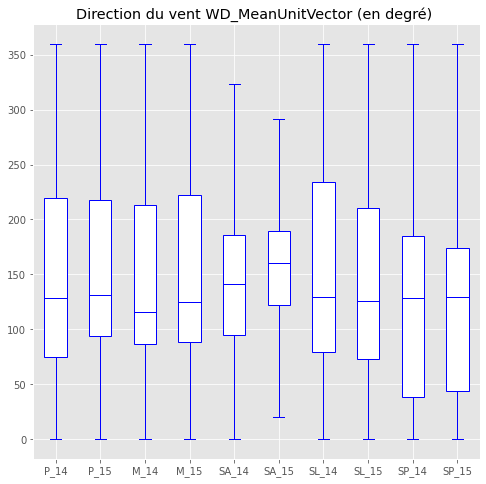

In [ ]:
box_plot_data=[P_2014["WD_MeanUnitVector"],P_2015["WD_MeanUnitVector"],M_2014["WD_MeanUnitVector"],M_2015["WD_MeanUnitVector"],SA_2014["WD_MeanUnitVector"],SA_2015["WD_MeanUnitVector"],SL_2014["WD_MeanUnitVector"],SL_2015["WD_MeanUnitVector"],SP_2014["WD_MeanUnitVector"],SP_2015["WD_MeanUnitVector"]]
fig, ax = plt.subplots(figsize=(8, 8))
box_plot2(box_plot_data, 'blue', 'white',labels,'Direction du vent WD_MeanUnitVector (en degré) ')   

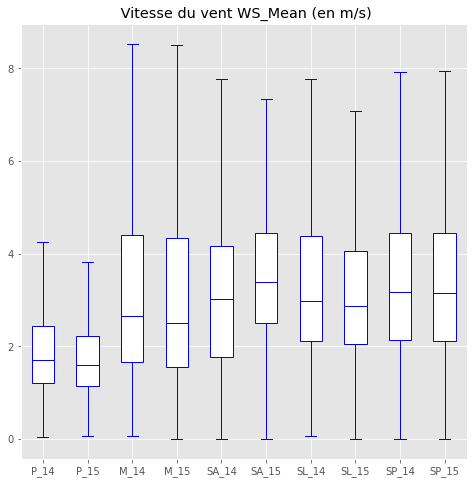

In [ ]:
box_plot_data=[P_2014["WS_Mean"],P_2015["WS_Mean"],M_2014["WS_Mean"],M_2015["WS_Mean"],SA_2014["WS_Mean"],SA_2015["WS_Mean"],SL_2014["WS_Mean"],SL_2015["WS_Mean"],SP_2014["WS_Mean"],SP_2015["WS_Mean"]]
fig, ax = plt.subplots(figsize=(8, 8))
box_plot2(box_plot_data, 'blue', 'white',labels,' Vitesse du vent WS_Mean (en m/s)')   

# Analyse de la corélation entre les attributs

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817956 entries, 1 to 1049580
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Timestamp          817956 non-null  datetime64[ns]
 1   FD_Avg             817956 non-null  float64       
 2   FG_Avg             817956 non-null  float64       
 3   Patm_Avg           817956 non-null  float64       
 4   RH_Avg             817956 non-null  float64       
 5   Text_Avg           817956 non-null  float64       
 6   WD_MeanUnitVector  817956 non-null  float64       
 7   WS_Mean            817956 non-null  float64       
 8   Kb                 817956 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 62.4 MB


In [ ]:
df.corr()

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,Kb
FD_Avg,1.000000,0.665849,-0.065834,-0.263602,0.503175,0.168593,0.356540,-0.164625
FG_Avg,0.665849,1.000000,-0.006609,-0.408678,0.517321,0.193735,0.432671,0.430714
Patm_Avg,-0.065834,-0.006609,1.000000,-0.408160,-0.569739,0.170396,-0.139141,0.067141
RH_Avg,-0.263602,-0.408678,-0.408160,1.000000,-0.051437,-0.297828,-0.133448,-0.217456
Text_Avg,0.503175,0.517321,-0.569739,-0.051437,1.000000,0.056751,0.297286,0.071763
WD_MeanUnitVector,0.168593,0.193735,0.170396,-0.297828,0.056751,1.000000,-0.023909,0.045008
WS_Mean,0.356540,0.432671,-0.139141,-0.133448,0.297286,-0.023909,1.000000,0.088447
Kb,-0.164625,0.430714,0.067141,-0.217456,0.071763,0.045008,0.088447,1.000000


Text(0.5, 1.0, 'ville de la Possession')

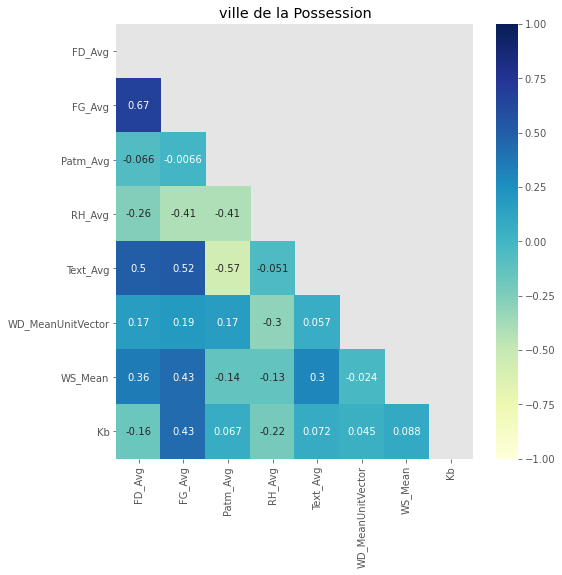

In [ ]:
import matplotlib.pyplot as mp 
import seaborn as sb 
import numpy as np 

fig, ax = mp.subplots(figsize=(8, 8))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = 1
# On trce la matrice de coorélation triagulaire
dataplot = sb.heatmap(df.corr(), mask=mask, ax=ax, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'YlGnBu') 
ax.set_title("Ville de la Possession")

Text(0.5, 1.0, 'Ville de Moufia')

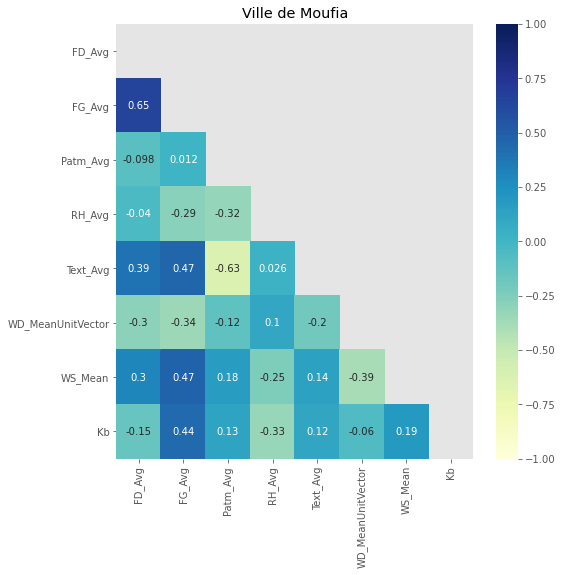

In [ ]:
fig, ax = mp.subplots(figsize=(8, 8))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = 1
sb.heatmap(df1.corr(), mask=mask, ax=ax, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'YlGnBu')
ax.set_title("Ville de Moufia")

Text(0.5, 1.0, 'Ville de Saint André')

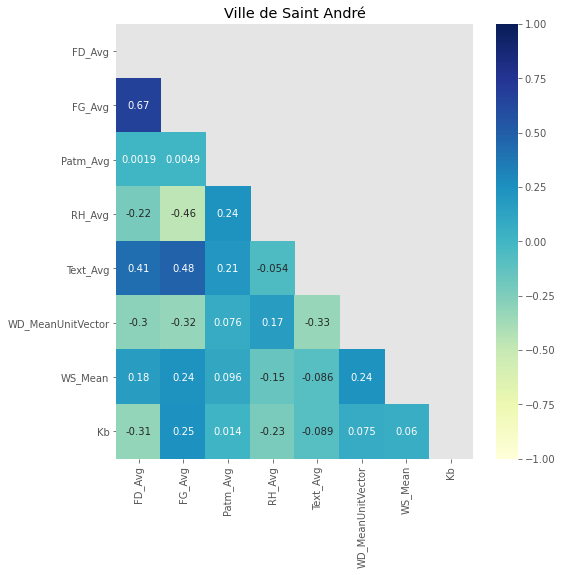

In [ ]:
fig, ax = mp.subplots(figsize=(8, 8))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = 1
sb.heatmap(df2.corr(), mask=mask, ax=ax, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'YlGnBu')
ax.set_title("Ville de Saint André")

Text(0.5, 1.0, 'Ville de Saint Leu')

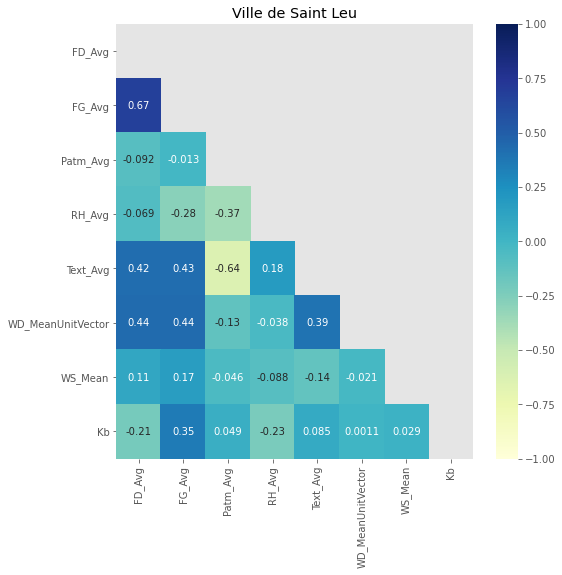

In [ ]:
fig, ax = mp.subplots(figsize=(8, 8))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = 1
sb.heatmap(df3.corr(), mask=mask, ax=ax, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'YlGnBu') 
ax.set_title("Ville de Saint Leu")

Text(0.5, 1.0, 'Ville de Saint Pierre')

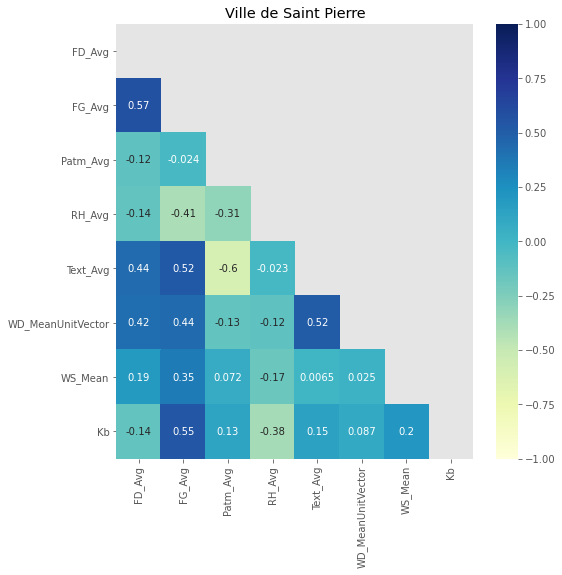

In [ ]:
fig, ax = mp.subplots(figsize=(8, 8))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = 1
sb.heatmap(df4.corr(), mask=mask, ax=ax, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'YlGnBu')
ax.set_title("Ville de Saint Pierre")

# Prétraitement des données

In [ ]:
from sklearn.preprocessing import MinMaxScaler
### on normalise les données dabord
d = datetime(2015, 1, 1, 0, 0,0)
d_stamp=df[df["Timestamp"]<d ]
d_stamp=d_stamp.drop(["Timestamp"],axis=1)
d_stamp = MinMaxScaler().fit_transform(d_stamp)

d_stamp2=df[df["Timestamp"]>=d ]
d_stamp2=d_stamp2.drop(["Timestamp"],axis=1)
d_stamp2 = MinMaxScaler().fit_transform(d_stamp2)

Myseries=[d_stamp,d_stamp2]

In [ ]:
len(d_stamp)

410613

In [ ]:
# Normalisation des données
from sklearn.preprocessing import StandardScaler
d = datetime(2015, 1, 1, 0, 0,0)
d_stamp=df[df["Timestamp"]<d ]
d_stamp=d_stamp.drop(["Timestamp"],axis=1)
d_stamp = StandardScaler().fit_transform(d_stamp)
d_stamp

array([[-0.80325464, -0.82872886, -1.00891568, ..., -0.20211754,
         0.14128697, -1.12471751],
       [-0.82449514, -0.83637408, -1.00891568, ..., -0.28858489,
        -0.14215757, -0.11777481],
       [-0.82405044, -0.8289029 , -1.02358453, ..., -0.19916825,
         0.07042605,  1.01097924],
       ...,
       [-0.80416829, -0.82716873, -1.14027853, ..., -0.89814721,
        -0.08546917, -0.71223071],
       [-0.82178651, -0.82786489, -1.14750349, ..., -0.88220253,
        -0.39725792,  0.85312296],
       [-0.82178651, -0.82803892, -1.16217234, ..., -0.9541941 ,
         0.12711444,  0.84073389]])

In [ ]:
d_stamp

array([[-0.80325464, -0.82872886, -1.00891568, ..., -0.20211754,
         0.14128697, -1.12471751],
       [-0.82449514, -0.83637408, -1.00891568, ..., -0.28858489,
        -0.14215757, -0.11777481],
       [-0.82405044, -0.8289029 , -1.02358453, ..., -0.19916825,
         0.07042605,  1.01097924],
       ...,
       [-0.80416829, -0.82716873, -1.14027853, ..., -0.89814721,
        -0.08546917, -0.71223071],
       [-0.82178651, -0.82786489, -1.14750349, ..., -0.88220253,
        -0.39725792,  0.85312296],
       [-0.82178651, -0.82803892, -1.16217234, ..., -0.9541941 ,
         0.12711444,  0.84073389]])

In [ ]:
possession = pd.read_csv("possession_2014_2015.csv")
moufia = pd.read_csv("moufia_2014_2015.csv")

In [ ]:
possession["Kb"]=(possession["FG_Avg"]-possession["FD_Avg"])/possession["FG_Avg"]

In [ ]:
possession['Timestamp']=pd.to_datetime(possession['Timestamp'])
data_hourly_possession = possession.resample('H',on='Timestamp').mean()

In [ ]:
data_hourly_possession=data_hourly_possession[data_hourly_possession["Kb"]>=0]

In [ ]:
data_hourly_possession=data_hourly_possession[data_hourly_possession["Kb"]<=1]

In [ ]:
data_hourly_possession["Kb_H-1"]=data_hourly_possession["Kb"]
data_hourly_possession["Kb_H-2"]=data_hourly_possession["Kb"]
data_hourly_possession["Kb_H-3"]=data_hourly_possession["Kb"]

In [ ]:
data_hourly_possession["FD_H-1"]=data_hourly_possession["FD_Avg"]
data_hourly_possession["FD_H-2"]=data_hourly_possession["FD_Avg"]
data_hourly_possession["FD_H-3"]=data_hourly_possession["FD_Avg"]

In [ ]:
data_hourly_possession["FG_H-1"]=data_hourly_possession["FG_Avg"]
data_hourly_possession["FG_H-2"]=data_hourly_possession["FG_Avg"]
data_hourly_possession["FG_H-3"]=data_hourly_possession["FG_Avg"]

In [ ]:
data_hourly_possession["Patm_H-1"]=data_hourly_possession["Patm_Avg"]
data_hourly_possession["Patm_H-2"]=data_hourly_possession["Patm_Avg"]
data_hourly_possession["Patm_H-3"]=data_hourly_possession["Patm_Avg"]

In [ ]:
data_hourly_possession["RH_H-1"]=data_hourly_possession["RH_Avg"]
data_hourly_possession["RH_H-2"]=data_hourly_possession["RH_Avg"]
data_hourly_possession["RH_H-3"]=data_hourly_possession["RH_Avg"]

In [ ]:
data_hourly_possession["Text_H-1"]=data_hourly_possession["Text_Avg"]
data_hourly_possession["Text_H-2"]=data_hourly_possession["Text_Avg"]
data_hourly_possession["Text_H-3"]=data_hourly_possession["Text_Avg"]

In [ ]:
data_hourly_possession["WD_MeanUnitVector_H-1"]=data_hourly_possession["WD_MeanUnitVector"]
data_hourly_possession["WD_MeanUnitVector_H-2"]=data_hourly_possession["WD_MeanUnitVector"]
data_hourly_possession["WD_MeanUnitVector_H-3"]=data_hourly_possession["WD_MeanUnitVector"]

In [ ]:
data_hourly_possession["WS_Mean_H-1"]=data_hourly_possession["WS_Mean"]
data_hourly_possession["WS_Mean_H-2"]=data_hourly_possession["WS_Mean"]
data_hourly_possession["WS_Mean_H-3"]=data_hourly_possession["WS_Mean"]

In [ ]:
data_hourly_possession.head()

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,Kb,Kb_H-1,Kb_H-2,...,RH_H-3,Text_H-1,Text_H-2,Text_H-3,WD_MeanUnitVector_H-1,WD_MeanUnitVector_H-2,WD_MeanUnitVector_H-3,WS_Mean_H-1,WS_Mean_H-2,WS_Mean_H-3
Timestamp,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,2.222033,2.935683,1009.296667,61.919998,26.766667,109.917462,1.416111,0.023750,0.023750,0.023750,...,61.919998,26.766667,26.766667,26.766667,109.917462,109.917462,109.917462,1.416111,1.416111,1.416111
2014-01-01 01:00:00,2.246267,3.341867,1008.596967,67.467221,26.727222,122.797093,0.991111,0.067311,0.067311,0.067311,...,67.467221,26.727222,26.727222,26.727222,122.797093,122.797093,122.797093,0.991111,0.991111,0.991111
2014-01-01 02:00:00,2.241650,3.145383,1008.072233,67.686110,26.469722,121.346898,0.971111,0.057886,0.057886,0.057886,...,67.686110,26.469722,26.469722,26.469722,121.346898,121.346898,121.346898,0.971111,0.971111,0.971111
2014-01-01 03:00:00,2.317033,3.431500,1008.202783,64.549443,26.728055,104.562909,1.489722,0.168305,0.168305,0.168305,...,64.549443,26.728055,26.728055,26.728055,104.562909,104.562909,104.562909,1.489722,1.489722,1.489722
2014-01-01 04:00:00,2.668283,4.268900,1008.255567,59.716386,27.358333,113.512547,1.503056,0.277276,0.277276,0.277276,...,59.716386,27.358333,27.358333,27.358333,113.512547,113.512547,113.512547,1.503056,1.503056,1.503056


In [ ]:
data_hourly_possession.reset_index(inplace=True)

In [ ]:
data_hourly_possession

,Timestamp,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,Kb,Kb_H-1,...,RH_H-3,Text_H-1,Text_H-2,Text_H-3,WD_MeanUnitVector_H-1,WD_MeanUnitVector_H-2,WD_MeanUnitVector_H-3,WS_Mean_H-1,WS_Mean_H-2,WS_Mean_H-3
0,2014-01-01 00:00:00,2.222033,2.935683,1009.296667,61.919998,26.766667,109.917462,1.416111,0.023750,0.023750,...,61.919998,26.766667,26.766667,26.766667,109.917462,109.917462,109.917462,1.416111,1.416111,1.416111
1,2014-01-01 01:00:00,2.246267,3.341867,1008.596967,67.467221,26.727222,122.797093,0.991111,0.067311,0.067311,...,67.467221,26.727222,26.727222,26.727222,122.797093,122.797093,122.797093,0.991111,0.991111,0.991111
2,2014-01-01 02:00:00,2.241650,3.145383,1008.072233,67.686110,26.469722,121.346898,0.971111,0.057886,0.057886,...,67.686110,26.469722,26.469722,26.469722,121.346898,121.346898,121.346898,0.971111,0.971111,0.971111
3,2014-01-01 03:00:00,2.317033,3.431500,1008.202783,64.549443,26.728055,104.562909,1.489722,0.168305,0.168305,...,64.549443,26.728055,26.728055,26.728055,104.562909,104.562909,104.562909,1.489722,1.489722,1.489722
4,2014-01-01 04:00:00,2.668283,4.268900,1008.255567,59.716386,27.358333,113.512547,1.503056,0.277276,0.277276,...,59.716386,27.358333,27.358333,27.358333,113.512547,113.512547,113.512547,1.503056,1.503056,1.503056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,2015-12-30 14:00:00,90.059000,91.506833,1009.799983,71.137777,27.129722,175.359822,1.439167,0.016568,0.016568,...,71.137777,27.129722,27.129722,27.129722,175.359822,175.359822,175.359822,1.439167,1.439167,1.439167
10331,2015-12-30 15:00:00,68.788667,69.491333,1009.356683,74.377220,26.141111,173.841727,1.295556,0.009418,0.009418,...,74.377220,26.141111,26.141111,26.141111,173.841727,173.841727,173.841727,1.295556,1.295556,1.295556
10332,2015-12-30 16:00:00,37.971500,39.594667,1009.150283,80.799165,24.839166,138.633123,1.070833,0.038894,0.038894,...,80.799165,24.839166,24.839166,24.839166,138.633123,138.633123,138.633123,1.070833,1.070833,1.070833
10333,2015-12-30 17:00:00,27.226000,28.889500,1009.131967,83.684720,24.431944,142.072356,0.841111,0.057609,0.057609,...,83.684720,24.431944,24.431944,24.431944,142.072356,142.072356,142.072356,0.841111,0.841111,0.841111


In [ ]:
data_hourly_possession.loc[1,"Kb"]

0.06731087079292197

In [ ]:
for i in range(3,10335):
    data_hourly_possession.loc[i,"Kb_H-1"]=data_hourly_possession.loc[i-1,"Kb"]
    data_hourly_possession.loc[i,"Kb_H-2"]=data_hourly_possession.loc[i-2,"Kb"]
    data_hourly_possession.loc[i,"Kb_H-3"]=data_hourly_possession.loc[i-3,"Kb"]

In [ ]:
for i in range(3,10335):
    data_hourly_possession.loc[i,"FD_H-1"]=data_hourly_possession.loc[i-1,"FD_Avg"]
    data_hourly_possession.loc[i,"FD_H-2"]=data_hourly_possession.loc[i-2,"FD_Avg"]
    data_hourly_possession.loc[i,"FD_H-3"]=data_hourly_possession.loc[i-3,"FD_Avg"]

In [ ]:
for i in range(3,10335):
    data_hourly_possession.loc[i,"FG_H-1"]=data_hourly_possession.loc[i-1,"FG_Avg"]
    data_hourly_possession.loc[i,"FG_H-2"]=data_hourly_possession.loc[i-2,"FG_Avg"]
    data_hourly_possession.loc[i,"FG_H-3"]=data_hourly_possession.loc[i-3,"FG_Avg"]

In [ ]:
for i in range(3,10335):
    data_hourly_possession.loc[i,"Patm_H-1"]=data_hourly_possession.loc[i-1,"Patm_Avg"]
    data_hourly_possession.loc[i,"Patm_H-2"]=data_hourly_possession.loc[i-2,"Patm_Avg"]
    data_hourly_possession.loc[i,"Patm_H-3"]=data_hourly_possession.loc[i-3,"Patm_Avg"]

In [ ]:
for i in range(3,10335):
    data_hourly_possession.loc[i,"RH_H-1"]=data_hourly_possession.loc[i-1,"RH_Avg"]
    data_hourly_possession.loc[i,"RH_H-2"]=data_hourly_possession.loc[i-2,"RH_Avg"]
    data_hourly_possession.loc[i,"RH_H-3"]=data_hourly_possession.loc[i-3,"RH_Avg"]

In [ ]:
for i in range(3,10335):
    data_hourly_possession.loc[i,"Text_H-1"]=data_hourly_possession.loc[i-1,"Text_Avg"]
    data_hourly_possession.loc[i,"Text_H-2"]=data_hourly_possession.loc[i-2,"Text_Avg"]
    data_hourly_possession.loc[i,"Text_H-3"]=data_hourly_possession.loc[i-3,"Text_Avg"]

In [ ]:
for i in range(3,10335):
    data_hourly_possession.loc[i,"WD_MeanUnitVector_H-1"]=data_hourly_possession.loc[i-1,"WD_MeanUnitVector"]
    data_hourly_possession.loc[i,"WD_MeanUnitVector_H-2"]=data_hourly_possession.loc[i-2,"WD_MeanUnitVector"]
    data_hourly_possession.loc[i,"WD_MeanUnitVector_H-3"]=data_hourly_possession.loc[i-3,"WD_MeanUnitVector"]

In [ ]:
for i in range(3,10335):
    data_hourly_possession.loc[i,"WS_Mean_H-1"]=data_hourly_possession.loc[i-1,"WS_Mean"]
    data_hourly_possession.loc[i,"WS_Mean_H-2"]=data_hourly_possession.loc[i-2,"WS_Mean"]
    data_hourly_possession.loc[i,"WS_Mean_H-3"]=data_hourly_possession.loc[i-3,"WS_Mean"]

# Régressions linéaire

In [ ]:
scalar=data_hourly_possession

In [ ]:
scalar=scalar.drop(["FG_Avg","FD_Avg","WS_Mean","WD_MeanUnitVector","Text_Avg","RH_Avg","FG_Avg","FD_Avg","Patm_Avg"],axis=1)

In [ ]:
scalar

,Timestamp,Kb,Kb_H-1,Kb_H-2,Kb_H-3,FD_H-1,FD_H-2,FD_H-3,FG_H-1,FG_H-2,...,RH_H-3,Text_H-1,Text_H-2,Text_H-3,WD_MeanUnitVector_H-1,WD_MeanUnitVector_H-2,WD_MeanUnitVector_H-3,WS_Mean_H-1,WS_Mean_H-2,WS_Mean_H-3
0,2014-01-01 00:00:00,0.023750,0.023750,0.023750,0.023750,2.222033,2.222033,2.222033,2.935683,2.935683,...,61.919998,26.766667,26.766667,26.766667,109.917462,109.917462,109.917462,1.416111,1.416111,1.416111
1,2014-01-01 01:00:00,0.067311,0.067311,0.067311,0.067311,2.246267,2.246267,2.246267,3.341867,3.341867,...,67.467221,26.727222,26.727222,26.727222,122.797093,122.797093,122.797093,0.991111,0.991111,0.991111
2,2014-01-01 02:00:00,0.057886,0.057886,0.057886,0.057886,2.241650,2.241650,2.241650,3.145383,3.145383,...,67.686110,26.469722,26.469722,26.469722,121.346898,121.346898,121.346898,0.971111,0.971111,0.971111
3,2014-01-01 03:00:00,0.168305,0.057886,0.067311,0.023750,2.241650,2.246267,2.222033,3.145383,3.341867,...,61.919998,26.469722,26.727222,26.766667,121.346898,122.797093,109.917462,0.971111,0.991111,1.416111
4,2014-01-01 04:00:00,0.277276,0.168305,0.057886,0.067311,2.317033,2.241650,2.246267,3.431500,3.145383,...,67.467221,26.728055,26.469722,26.727222,104.562909,121.346898,122.797093,1.489722,0.971111,0.991111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,2015-12-30 14:00:00,0.016568,0.006368,0.021134,0.021968,119.536667,116.435000,176.926667,120.318333,118.915000,...,54.430554,27.642777,28.343333,29.238611,134.023886,81.965569,64.173795,1.412500,2.021389,2.522222
10331,2015-12-30 15:00:00,0.009418,0.016568,0.006368,0.021134,90.059000,119.536667,116.435000,91.506833,120.318333,...,58.044997,27.129722,27.642777,28.343333,175.359822,134.023886,81.965569,1.439167,1.412500,2.021389
10332,2015-12-30 16:00:00,0.038894,0.009418,0.016568,0.006368,68.788667,90.059000,119.536667,69.491333,91.506833,...,65.018609,26.141111,27.129722,27.642777,173.841727,175.359822,134.023886,1.295556,1.439167,1.412500
10333,2015-12-30 17:00:00,0.057609,0.038894,0.009418,0.016568,37.971500,68.788667,90.059000,39.594667,69.491333,...,71.137777,24.839166,26.141111,27.129722,138.633123,173.841727,175.359822,1.070833,1.295556,1.439167


In [ ]:
scalar = scalar.drop(index=[0,1,2])

In [ ]:
X=scalar.iloc[:,2:]
y=scalar.iloc[:,1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

0.6397644527740285

# Modèle arbre de décision

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

1.0

In [ ]:
reg.score(X_test, y_test)

0.3992807659507065

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)

reg.score(X_test, y_test)

0.7132734398932674

# Prétraitement : Suppression des valeurs abérrantes de KB + agrégation en heures

In [ ]:
possession = pd.read_csv("possession_2014_2015.csv")


possession["Kb"]=(possession["FG_Avg"]-possession["FD_Avg"])/possession["FG_Avg"]


possession['Timestamp'] = pd.to_datetime(possession['Timestamp'], format='%Y%m%d %H:%M:%S')

possession=possession[possession["Kb"]>=0]

possession=possession[possession["Kb"]<=1]

data_hourly_possession = possession.resample('H',on='Timestamp').mean()

In [ ]:
data_hourly_possession

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,Kb
Timestamp,,,,,,,,
2014-01-01 00:00:00,1.386857,3.247548,1009.303571,61.773807,26.765080,110.761730,1.483333,0.514160
2014-01-01 01:00:00,1.630000,3.890114,1008.577295,67.603787,26.731439,124.160171,1.010985,0.554001
2014-01-01 02:00:00,1.693977,3.684302,1008.070535,67.656588,26.485659,123.007079,0.972868,0.523351
2014-01-01 03:00:00,1.868633,3.698735,1008.212571,64.755781,26.704082,105.846443,1.473469,0.472016
2014-01-01 04:00:00,2.297480,4.522300,1008.239000,59.488997,27.396999,109.499254,1.505333,0.458753
...,...,...,...,...,...,...,...,...
2015-12-30 19:00:00,2.168639,4.250333,1009.735667,86.338886,24.047685,161.545603,1.205555,0.454577
2015-12-30 20:00:00,2.417000,4.576121,1009.933848,85.619695,23.747475,147.995273,1.130808,0.450012
2015-12-30 21:00:00,2.621023,4.758488,1010.377116,83.577517,23.522480,142.844384,1.137209,0.441002


# Prétraitement : on ajoute à chaque colonne les valeurs en H-1, H-2, H-3 

In [ ]:
data_hourly_possession["Kb_H-1"]=data_hourly_possession["Kb"]
data_hourly_possession["Kb_H-2"]=data_hourly_possession["Kb"]
data_hourly_possession["Kb_H-3"]=data_hourly_possession["Kb"]

In [ ]:
data_hourly_possession["FD_H-1"]=data_hourly_possession["FD_Avg"]
data_hourly_possession["FD_H-2"]=data_hourly_possession["FD_Avg"]
data_hourly_possession["FD_H-3"]=data_hourly_possession["FD_Avg"]

In [ ]:
data_hourly_possession["FG_H-1"]=data_hourly_possession["FG_Avg"]
data_hourly_possession["FG_H-2"]=data_hourly_possession["FG_Avg"]
data_hourly_possession["FG_H-3"]=data_hourly_possession["FG_Avg"]

In [ ]:
data_hourly_possession["Patm_H-1"]=data_hourly_possession["Patm_Avg"]
data_hourly_possession["Patm_H-2"]=data_hourly_possession["Patm_Avg"]
data_hourly_possession["Patm_H-3"]=data_hourly_possession["Patm_Avg"]

In [ ]:
data_hourly_possession["RH_H-1"]=data_hourly_possession["RH_Avg"]
data_hourly_possession["RH_H-2"]=data_hourly_possession["RH_Avg"]
data_hourly_possession["RH_H-3"]=data_hourly_possession["RH_Avg"]

In [ ]:
data_hourly_possession["Text_H-1"]=data_hourly_possession["Text_Avg"]
data_hourly_possession["Text_H-2"]=data_hourly_possession["Text_Avg"]
data_hourly_possession["Text_H-3"]=data_hourly_possession["Text_Avg"]

In [ ]:
data_hourly_possession["WD_MeanUnitVector_H-1"]=data_hourly_possession["WD_MeanUnitVector"]
data_hourly_possession["WD_MeanUnitVector_H-2"]=data_hourly_possession["WD_MeanUnitVector"]
data_hourly_possession["WD_MeanUnitVector_H-3"]=data_hourly_possession["WD_MeanUnitVector"]

In [ ]:
data_hourly_possession["WS_Mean_H-1"]=data_hourly_possession["WS_Mean"]
data_hourly_possession["WS_Mean_H-2"]=data_hourly_possession["WS_Mean"]
data_hourly_possession["WS_Mean_H-3"]=data_hourly_possession["WS_Mean"]

In [ ]:
data_hourly_possession.reset_index(inplace=True)

In [ ]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"Kb_H-1"]=data_hourly_possession.loc[i-1,"Kb"]
    data_hourly_possession.loc[i,"Kb_H-2"]=data_hourly_possession.loc[i-2,"Kb"]
    data_hourly_possession.loc[i,"Kb_H-3"]=data_hourly_possession.loc[i-3,"Kb"]

In [ ]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"FD_H-1"]=data_hourly_possession.loc[i-1,"FD_Avg"]
    data_hourly_possession.loc[i,"FD_H-2"]=data_hourly_possession.loc[i-2,"FD_Avg"]
    data_hourly_possession.loc[i,"FD_H-3"]=data_hourly_possession.loc[i-3,"FD_Avg"]

In [ ]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"FG_H-1"]=data_hourly_possession.loc[i-1,"FG_Avg"]
    data_hourly_possession.loc[i,"FG_H-2"]=data_hourly_possession.loc[i-2,"FG_Avg"]
    data_hourly_possession.loc[i,"FG_H-3"]=data_hourly_possession.loc[i-3,"FG_Avg"]

In [ ]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"Patm_H-1"]=data_hourly_possession.loc[i-1,"Patm_Avg"]
    data_hourly_possession.loc[i,"Patm_H-2"]=data_hourly_possession.loc[i-2,"Patm_Avg"]
    data_hourly_possession.loc[i,"Patm_H-3"]=data_hourly_possession.loc[i-3,"Patm_Avg"]

In [ ]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"RH_H-1"]=data_hourly_possession.loc[i-1,"RH_Avg"]
    data_hourly_possession.loc[i,"RH_H-2"]=data_hourly_possession.loc[i-2,"RH_Avg"]
    data_hourly_possession.loc[i,"RH_H-3"]=data_hourly_possession.loc[i-3,"RH_Avg"]

In [ ]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"Text_H-1"]=data_hourly_possession.loc[i-1,"Text_Avg"]
    data_hourly_possession.loc[i,"Text_H-2"]=data_hourly_possession.loc[i-2,"Text_Avg"]
    data_hourly_possession.loc[i,"Text_H-3"]=data_hourly_possession.loc[i-3,"Text_Avg"]

In [ ]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"WD_MeanUnitVector_H-1"]=data_hourly_possession.loc[i-1,"WD_MeanUnitVector"]
    data_hourly_possession.loc[i,"WD_MeanUnitVector_H-2"]=data_hourly_possession.loc[i-2,"WD_MeanUnitVector"]
    data_hourly_possession.loc[i,"WD_MeanUnitVector_H-3"]=data_hourly_possession.loc[i-3,"WD_MeanUnitVector"]

In [ ]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"WS_Mean_H-1"]=data_hourly_possession.loc[i-1,"WS_Mean"]
    data_hourly_possession.loc[i,"WS_Mean_H-2"]=data_hourly_possession.loc[i-2,"WS_Mean"]
    data_hourly_possession.loc[i,"WS_Mean_H-3"]=data_hourly_possession.loc[i-3,"WS_Mean"]

In [ ]:
# Régression linéaire

In [ ]:
scalar2=data_hourly_possession

In [ ]:
scalar2=scalar2.drop(["FG_Avg","FD_Avg","WS_Mean","WD_MeanUnitVector","Text_Avg","RH_Avg","FG_Avg","FD_Avg","Patm_Avg"],axis=1)

In [ ]:
scalar2 = scalar2.drop(index=[0,1,2])

In [ ]:
X=scalar2.iloc[:,2:]
y=scalar2.iloc[:,1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

reg.score(X_test, y_test)

0.584538538279159

In [ ]:
reg.score(X_train, y_train)

0.5826167536522546

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)

reg.score(X_test, y_test)

0.6799695573831583

In [ ]:
reg.score(X_train, y_train)

0.9550677525133094

# On applique plusieurs algorithmes de regression

In [ ]:
import math
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import*

In [ ]:
model_factory = [
    RandomForestRegressor(),
    XGBRegressor(nthread=1),
    Ridge(),
    DecisionTreeRegressor(),
    BayesianRidge(),
    ExtraTreesRegressor(),
    ElasticNet(),
    KNeighborsRegressor(),
    GradientBoostingRegressor()
]



for model in model_factory:
    model.seed = 42
    num_folds = 10
    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='r2', n_jobs=8)
    score_description = " %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)
    
    print('{model:25} CV-10 R2: {score}'.format(
       model=model.__class__.__name__,
       score=score_description
    ))

RandomForestRegressor     CV-10 R2:  0.68 (+/- 0.03)
XGBRegressor              CV-10 R2:  0.66 (+/- 0.04)
Ridge                     CV-10 R2:  0.58 (+/- 0.05)
DecisionTreeRegressor     CV-10 R2:  0.37 (+/- 0.09)
BayesianRidge             CV-10 R2:  0.58 (+/- 0.05)
ExtraTreesRegressor       CV-10 R2:  0.68 (+/- 0.04)
ElasticNet                CV-10 R2:  0.48 (+/- 0.05)
KNeighborsRegressor       CV-10 R2:  0.57 (+/- 0.04)
GradientBoostingRegressor CV-10 R2:  0.67 (+/- 0.04)


In [ ]:

for model in model_factory:
    model.seed = 42
    num_folds = 10
    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)
    score_description = " %0.2f (+/- %0.2f)" % (math.sqrt(scores.mean()*-1), scores.std() * 2)
    print('{model:25} CV-10 rmse: {rmse}'.format(
       model=model.__class__.__name__,
       rmse=score_description
    ))

RandomForestRegressor     CV-10 rmse:  0.12 (+/- 0.00)
XGBRegressor              CV-10 rmse:  0.13 (+/- 0.00)
Ridge                     CV-10 rmse:  0.14 (+/- 0.00)
DecisionTreeRegressor     CV-10 rmse:  0.17 (+/- 0.00)
BayesianRidge             CV-10 rmse:  0.14 (+/- 0.00)
ExtraTreesRegressor       CV-10 rmse:  0.12 (+/- 0.00)
ElasticNet                CV-10 rmse:  0.16 (+/- 0.00)
KNeighborsRegressor       CV-10 rmse:  0.14 (+/- 0.00)
GradientBoostingRegressor CV-10 rmse:  0.12 (+/- 0.00)


# Nous appliquons la régression en augmentant le pas des heures. 
# Enrichissement de la base de données avec les données passés H-1, H-2, H-3 et H-4

In [ ]:
possession = pd.read_csv("possession_2014_2015.csv")
possession["Kb"]=(possession["FG_Avg"]-possession["FD_Avg"])/possession["FG_Avg"]
possession['Timestamp'] = pd.to_datetime(possession['Timestamp'], format='%Y%m%d %H:%M:%S')
possession=possession[possession["Kb"]>=0]
possession=possession[possession["Kb"]<=1]
df = possession.resample('H',on='Timestamp').mean()

In [ ]:
df

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,Kb
Timestamp,,,,,,,,
2014-01-01 00:00:00,1.386857,3.247548,1009.303571,61.773807,26.765080,110.761730,1.483333,0.514160
2014-01-01 01:00:00,1.630000,3.890114,1008.577295,67.603787,26.731439,124.160171,1.010985,0.554001
2014-01-01 02:00:00,1.693977,3.684302,1008.070535,67.656588,26.485659,123.007079,0.972868,0.523351
2014-01-01 03:00:00,1.868633,3.698735,1008.212571,64.755781,26.704082,105.846443,1.473469,0.472016
2014-01-01 04:00:00,2.297480,4.522300,1008.239000,59.488997,27.396999,109.499254,1.505333,0.458753
...,...,...,...,...,...,...,...,...
2015-12-30 19:00:00,2.168639,4.250333,1009.735667,86.338886,24.047685,161.545603,1.205555,0.454577
2015-12-30 20:00:00,2.417000,4.576121,1009.933848,85.619695,23.747475,147.995273,1.130808,0.450012
2015-12-30 21:00:00,2.621023,4.758488,1010.377116,83.577517,23.522480,142.844384,1.137209,0.441002


In [ ]:
df["Kb_H-1"]=df["Kb"]
df["Kb_H-2"]=df["Kb"]
df["Kb_H-3"]=df["Kb"]
df["Kb_H-4"]=df["Kb"]

In [ ]:
df["FD_H-1"]=df["FD_Avg"]
df["FD_H-2"]=df["FD_Avg"]
df["FD_H-3"]=df["FD_Avg"]
df["FD_H-4"]=df["FD_Avg"]

In [ ]:
df["FG_H-1"]=df["FG_Avg"]
df["FG_H-2"]=df["FG_Avg"]
df["FG_H-3"]=df["FG_Avg"]
df["FG_H-4"]=df["FG_Avg"]

In [ ]:
df["Patm_H-1"]=df["Patm_Avg"]
df["Patm_H-2"]=df["Patm_Avg"]
df["Patm_H-3"]=df["Patm_Avg"]
df["Patm_H-4"]=df["Patm_Avg"]

In [ ]:
df["RH_H-1"]=df["RH_Avg"]
df["RH_H-2"]=df["RH_Avg"]
df["RH_H-3"]=df["RH_Avg"]
df["RH_H-4"]=df["RH_Avg"]

In [ ]:
df["Text_H-1"]=df["Text_Avg"]
df["Text_H-2"]=df["Text_Avg"]
df["Text_H-3"]=df["Text_Avg"]
df["Text_H-4"]=df["Text_Avg"]

In [ ]:
df["WD_MeanUnitVector_H-1"]=df["WD_MeanUnitVector"]
df["WD_MeanUnitVector_H-2"]=df["WD_MeanUnitVector"]
df["WD_MeanUnitVector_H-3"]=df["WD_MeanUnitVector"]
df["WD_MeanUnitVector_H-4"]=df["WD_MeanUnitVector"]

In [ ]:
df["WS_Mean_H-1"]=df["WS_Mean"]
df["WS_Mean_H-2"]=df["WS_Mean"]
df["WS_Mean_H-3"]=df["WS_Mean"]
df["WS_Mean_H-4"]=df["WS_Mean"]

In [ ]:
df.reset_index(inplace=True)

In [ ]:
for i in range(4,17496):
    df.loc[i,"Kb_H-1"]=df.loc[i-1,"Kb"]
    df.loc[i,"Kb_H-2"]=df.loc[i-2,"Kb"]
    df.loc[i,"Kb_H-3"]=df.loc[i-3,"Kb"]
    df.loc[i,"Kb_H-4"]=df.loc[i-4,"Kb"]

In [ ]:
for i in range(4,17496):
    df.loc[i,"FD_H-1"]=df.loc[i-1,"FD_Avg"]
    df.loc[i,"FD_H-2"]=df.loc[i-2,"FD_Avg"]
    df.loc[i,"FD_H-3"]=df.loc[i-3,"FD_Avg"]
    df.loc[i,"FD_H-4"]=df.loc[i-4,"FD_Avg"]

In [ ]:
for i in range(4,17496):
    df.loc[i,"FG_H-1"]=df.loc[i-1,"FG_Avg"]
    df.loc[i,"FG_H-2"]=df.loc[i-2,"FG_Avg"]
    df.loc[i,"FG_H-3"]=df.loc[i-3,"FG_Avg"]
    df.loc[i,"FG_H-4"]=df.loc[i-4,"FG_Avg"]

In [ ]:
for i in range(4,17496):
    df.loc[i,"Patm_H-1"]=df.loc[i-1,"Patm_Avg"]
    df.loc[i,"Patm_H-2"]=df.loc[i-2,"Patm_Avg"]
    df.loc[i,"Patm_H-3"]=df.loc[i-3,"Patm_Avg"]
    df.loc[i,"Patm_H-4"]=df.loc[i-4,"Patm_Avg"]

In [ ]:
for i in range(4,17496):
    df.loc[i,"RH_H-1"]=df.loc[i-1,"RH_Avg"]
    df.loc[i,"RH_H-2"]=df.loc[i-2,"RH_Avg"]
    df.loc[i,"RH_H-3"]=df.loc[i-3,"RH_Avg"]
    df.loc[i,"RH_H-4"]=df.loc[i-4,"RH_Avg"]

In [ ]:
for i in range(4,17496):
    df.loc[i,"Text_H-1"]=df.loc[i-1,"Text_Avg"]
    df.loc[i,"Text_H-2"]=df.loc[i-2,"Text_Avg"]
    df.loc[i,"Text_H-3"]=df.loc[i-3,"Text_Avg"]
    df.loc[i,"Text_H-4"]=df.loc[i-4,"Text_Avg"]

In [ ]:
for i in range(4,17496):
    df.loc[i,"WD_MeanUnitVector_H-1"]=df.loc[i-1,"WD_MeanUnitVector"]
    df.loc[i,"WD_MeanUnitVector_H-2"]=df.loc[i-2,"WD_MeanUnitVector"]
    df.loc[i,"WD_MeanUnitVector_H-3"]=df.loc[i-3,"WD_MeanUnitVector"]
    df.loc[i,"WD_MeanUnitVector_H-4"]=df.loc[i-4,"WD_MeanUnitVector"]

In [ ]:
for i in range(4,17496):
    df.loc[i,"WS_Mean_H-1"]=df.loc[i-1,"WS_Mean"]
    df.loc[i,"WS_Mean_H-2"]=df.loc[i-2,"WS_Mean"]
    df.loc[i,"WS_Mean_H-3"]=df.loc[i-3,"WS_Mean"]
    df.loc[i,"WS_Mean_H-4"]=df.loc[i-4,"WS_Mean"]

In [ ]:
scalar2=df

In [ ]:
scalar2=scalar2.drop(["FG_Avg","FD_Avg","WS_Mean","WD_MeanUnitVector","Text_Avg","RH_Avg","FG_Avg","FD_Avg","Patm_Avg"],axis=1)

In [ ]:
scalar2.head()

,Timestamp,Kb,Kb_H-1,Kb_H-2,Kb_H-3,Kb_H-4,FD_H-1,FD_H-2,FD_H-3,FD_H-4,...,Text_H-3,Text_H-4,WD_MeanUnitVector_H-1,WD_MeanUnitVector_H-2,WD_MeanUnitVector_H-3,WD_MeanUnitVector_H-4,WS_Mean_H-1,WS_Mean_H-2,WS_Mean_H-3,WS_Mean_H-4
0,2014-01-01 00:00:00,0.514160,0.514160,0.514160,0.514160,0.514160,1.386857,1.386857,1.386857,1.386857,...,26.765080,26.765080,110.761730,110.761730,110.761730,110.761730,1.483333,1.483333,1.483333,1.483333
1,2014-01-01 01:00:00,0.554001,0.554001,0.554001,0.554001,0.554001,1.630000,1.630000,1.630000,1.630000,...,26.731439,26.731439,124.160171,124.160171,124.160171,124.160171,1.010985,1.010985,1.010985,1.010985
2,2014-01-01 02:00:00,0.523351,0.523351,0.523351,0.523351,0.523351,1.693977,1.693977,1.693977,1.693977,...,26.485659,26.485659,123.007079,123.007079,123.007079,123.007079,0.972868,0.972868,0.972868,0.972868
3,2014-01-01 03:00:00,0.472016,0.472016,0.472016,0.472016,0.472016,1.868633,1.868633,1.868633,1.868633,...,26.704082,26.704082,105.846443,105.846443,105.846443,105.846443,1.473469,1.473469,1.473469,1.473469
4,2014-01-01 04:00:00,0.458753,0.472016,0.523351,0.554001,0.514160,1.868633,1.693977,1.630000,1.386857,...,26.731439,26.765080,105.846443,123.007079,124.160171,110.761730,1.473469,0.972868,1.010985,1.483333


In [ ]:
scalar2 = scalar2.drop(index=[0,1,2,3])

In [ ]:
X=scalar2.iloc[:,2:]
y=scalar2.iloc[:,1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

reg.score(X_test, y_test)

0.6054592158474978

In [ ]:
reg.score(X_train, y_train)

0.5786380288364977

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)

reg.score(X_test, y_test)

0.6956645719410783

In [ ]:
reg.score(X_train, y_train)

0.9549493305817249

In [ ]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
model_factory = [
    RandomForestRegressor(),
    XGBRegressor(nthread=1),
    Ridge(),
    DecisionTreeRegressor(),
    BayesianRidge(),
    ExtraTreesRegressor(),
    ElasticNet(),
    KNeighborsRegressor(),
    GradientBoostingRegressor()
]

for model in model_factory:
    model.seed = 42
    num_folds = 10

    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='r2', n_jobs=8)
    score_description = " %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

    print('{model:25} CV-10 R2: {score}'.format(
        model=model.__class__.__name__,
        score=score_description
    ))

RandomForestRegressor     CV-10 R2:  0.67 (+/- 0.03)
XGBRegressor              CV-10 R2:  0.64 (+/- 0.04)
Ridge                     CV-10 R2:  0.57 (+/- 0.06)
DecisionTreeRegressor     CV-10 R2:  0.37 (+/- 0.06)
BayesianRidge             CV-10 R2:  0.57 (+/- 0.06)
ExtraTreesRegressor       CV-10 R2:  0.68 (+/- 0.04)
ElasticNet                CV-10 R2:  0.47 (+/- 0.05)
KNeighborsRegressor       CV-10 R2:  0.55 (+/- 0.04)
GradientBoostingRegressor CV-10 R2:  0.66 (+/- 0.04)


In [ ]:
for model in model_factory:
    model.seed = 42
    num_folds = 10
    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)
    score_description = " %0.2f (+/- %0.2f)" % (math.sqrt(scores.mean()*-1), (-1* scores).std() * 2)
    print('{model:25} CV-10 rmse: {rmse}'.format(
       model=model.__class__.__name__,
       rmse=score_description
    ))

RandomForestRegressor     CV-10 rmse:  0.12 (+/- 0.00)
XGBRegressor              CV-10 rmse:  0.13 (+/- 0.00)
Ridge                     CV-10 rmse:  0.14 (+/- 0.00)
DecisionTreeRegressor     CV-10 rmse:  0.17 (+/- 0.00)
BayesianRidge             CV-10 rmse:  0.14 (+/- 0.00)


### Clustering des données au pas des heures

Clustering par heure

In [ ]:
possession_cluster = pd.read_csv("possession_2014_2015.csv")
possession_cluster["Kb"]=(possession_cluster["FG_Avg"]-possession_cluster["FD_Avg"])/possession_cluster["FG_Avg"]

possession_cluster['Timestamp'] = pd.to_datetime(possession_cluster['Timestamp'], format='%Y%m%d %H:%M:%S')

data_hourly_possession_cluster = possession_cluster.resample('H',on='Timestamp').mean()

data_hourly_possession_cluster=data_hourly_possession_cluster[data_hourly_possession_cluster["Kb"]>=0]
data_hourly_possession_cluster=data_hourly_possession_cluster[data_hourly_possession_cluster["Kb"]<=1]

In [ ]:
! pip install tslearn

In [ ]:
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

data_hourly_possession_cluster = StandardScaler().fit_transform(data_hourly_possession_cluster)

kmeans = KMeans(n_clusters=10)
model = kmeans.fit(data_hourly_possession_cluster)##### d_stamp c'était les données de 2014
print("model\n", model)

model
 KMeans(n_clusters=10)


In [ ]:
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    Z = [np.append(A, index) for index, A in enumerate(centers)]
    
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [ ]:
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [ ]:
features=["Patm_Avg","RH_Avg","Text_Avg","WD_MeanUnitVector", "WS_Mean","FD_Avg","FG_Avg","Kb"]

In [ ]:
centers = model.cluster_centers_
centers

array([[-0.32900104, -0.75204389, -0.78389619,  0.27282508,  0.75980107,
        -0.13896197, -0.15992804, -0.73782839],
       [ 0.0373729 ,  0.99727854,  1.06724106, -1.11631449, -0.36692971,
         1.21253395,  0.21291591,  1.23674709],
       [-0.65203107, -0.38025482,  1.17785269, -0.71017309, -1.63622311,
        -0.23917325, -0.68174143,  0.80208132],
       [-0.33463086,  0.54117791, -0.34129828, -0.27190269,  0.57538647,
        -0.36175537, -0.3954455 ,  1.31416136],
       [-0.76094814, -0.95867919,  0.46804838,  0.24367882, -0.90343369,
        -0.30126404, -0.53095095, -0.80324678],
       [ 1.64976174,  0.59620532, -0.5506723 ,  0.29808001,  0.78078806,
        -1.06495758,  0.72616832, -0.39683542],
       [ 0.85363814,  0.02841641,  0.95257629, -0.75011197, -0.52404934,
         0.97371016,  0.03806563, -0.50553761],
       [ 0.18505402,  1.36592041, -0.43579227,  0.02015112,  0.64745824,
        -1.13851284,  2.27130508,  1.17583496],
       [-0.89122365, -1.04112348

In [ ]:
P = pd_centers(features, centers)
P

,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,FD_Avg,FG_Avg,Kb,prediction
0,-0.329001,-0.752044,-0.783896,0.272825,0.759801,-0.138962,-0.159928,-0.737828,0
1,0.037373,0.997279,1.067241,-1.116314,-0.366930,1.212534,0.212916,1.236747,1
2,-0.652031,-0.380255,1.177853,-0.710173,-1.636223,-0.239173,-0.681741,0.802081,2
3,-0.334631,0.541178,-0.341298,-0.271903,0.575386,-0.361755,-0.395446,1.314161,3
4,-0.760948,-0.958679,0.468048,0.243679,-0.903434,-0.301264,-0.530951,-0.803247,4
5,1.649762,0.596205,-0.550672,0.298080,0.780788,-1.064958,0.726168,-0.396835,5
6,0.853638,0.028416,0.952576,-0.750112,-0.524049,0.973710,0.038066,-0.505538,6
7,0.185054,1.365920,-0.435792,0.020151,0.647458,-1.138513,2.271305,1.175835,7
8,-0.891224,-1.041123,-0.720286,1.388084,-0.293217,-0.477745,-0.640203,-0.919288,8
9,1.085476,0.934120,-0.485994,-0.351145,1.224324,1.200962,0.269577,0.264855,9


In [ ]:
P.shape

(10, 9)

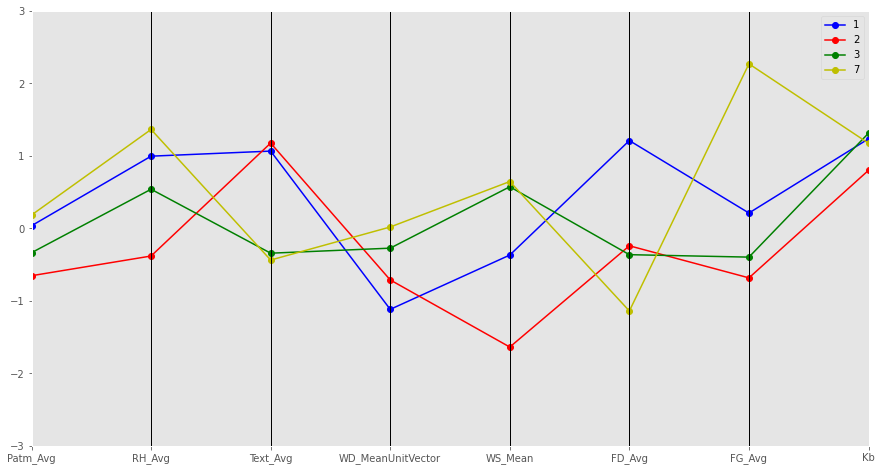

In [ ]:
parallel_plot(P[P['Kb'] > 0.5])

# Clustering des données à l'échelle du jour

In [ ]:
# Méthode pour tracer la courbe SSE.
def drawSSEPlot(df, column_indices, n_clusters=20, max_iter=300, tol=1e-04, init='k-means++', n_init=10, algorithm='auto'): 
    import matplotlib.pyplot as plt
    inertia_values = []
    for i in range(1, n_clusters+1):
        km = KMeans(n_clusters=i, max_iter=max_iter, tol=tol, init=init, n_init=n_init, random_state=1, algorithm=algorithm)
        km.fit_predict(df.iloc[:, column_indices])
        inertia_values.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(range(1, n_clusters+1), inertia_values, color='red')
    plt.xlabel('No. of Clusters', fontsize=15)
    plt.ylabel('SSE / Inertia', fontsize=15)
    plt.title('SSE / Inertia vs No. Of Clusters', fontsize=15)
    plt.grid()
    plt.show()

In [ ]:
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
possession_cluster = pd.read_csv("possession_2014_2015.csv")
possession_cluster["Kb"]=(possession_cluster["FG_Avg"]-possession_cluster["FD_Avg"])/possession_cluster["FG_Avg"]

possession_cluster['Timestamp'] = pd.to_datetime(possession_cluster['Timestamp'], format='%Y%m%d %H:%M:%S')

data_daily_possession_cluster = possession_cluster.resample('D',on='Timestamp').mean()

data_daily_possession_cluster=data_daily_possession_cluster[data_daily_possession_cluster["Kb"]>=0]
data_daily_possession_cluster=data_daily_possession_cluster[data_daily_possession_cluster["Kb"]<=1]


In [ ]:
data_daily_possession_cluster.columns

Index(['FD_Avg', 'FG_Avg', 'Patm_Avg', 'RH_Avg', 'Text_Avg',
       'WD_MeanUnitVector', 'WS_Mean', 'Kb'],
      dtype='object')

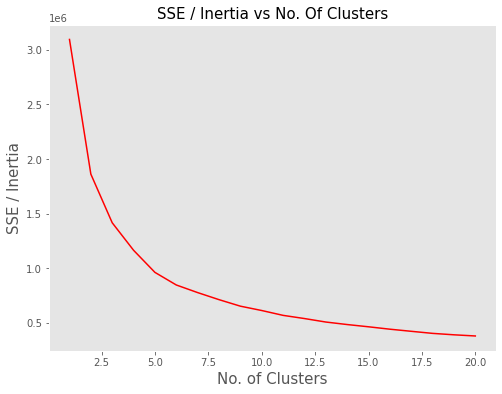

In [ ]:
drawSSEPlot(data_daily_possession_cluster,[0,1,2,3,4,5,6,7])

In [ ]:
#### on applique le clustering
data_daily_possession_cluster = StandardScaler().fit_transform(data_daily_possession_cluster)


kmeans = KMeans(n_clusters=8)
model = kmeans.fit(data_daily_possession_cluster)##### d_stamp c'était les données de 2014
print("model\n", model)


### Clustering avec DBSCAN

#from sklearn.cluster import DBSCAN

#print("\n\nDBSCAN : \n")
#dbscan = DBSCAN(min_samples=2).fit(data_hourly_possession_cluster)
#predic = dbscan.labels_

#print(predic.tolist())
#data_hourly_possession_cluster2 = data_hourly_possession_cluster
#data_hourly_possession_cluster2['cluster'] = predic.tolist()

#print(data_hourly_possession_cluster2.head())

#import plotly.express as px
#fig = px.parallel_coordinates(data_hourly_possession_cluster2, color="cluster",color_continuous_scale=px.colors.diverging.Tealrose,color_continuous_midpoint=2)
#fig.show()

model
 KMeans()


In [ ]:
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    Z = [np.append(A, index) for index, A in enumerate(centers)]
    
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [ ]:
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [ ]:
features=["Patm_Avg","RH_Avg","Text_Avg","WD_MeanUnitVector", "WS_Mean","FD_Avg","FG_Avg","Kb"]

In [ ]:
centers = model.cluster_centers_
centers

array([[-1.03791821, -0.38273515,  1.25189578, -1.09606934, -1.50951516,
         0.79353083, -0.23575066, -0.88603919],
       [ 0.51191046,  0.17243405, -0.45529191,  0.22811072,  0.73908111,
         0.42625337, -0.33957518,  0.51802943],
       [ 1.68908629,  0.25268494, -0.7390231 ,  0.51704133,  0.78476666,
        -1.34135453,  0.84188351, -0.13582655],
       [ 0.56344932,  0.3700253 ,  0.93107494, -0.71902274, -0.93219556,
         0.49691664, -0.16822745, -0.8341172 ],
       [-0.31134053,  1.21573182, -0.07931299, -0.05429807,  0.19650738,
        -1.92179422,  3.13691478,  1.17414722],
       [-0.64698163, -0.65457022,  0.24856148,  0.02661112, -0.18321594,
         0.01476355, -0.16725498, -0.10588882],
       [-0.38693805,  1.41933246, -0.75798771, -0.06436948,  0.76727664,
        -0.45967343,  0.26171725,  1.54216342],
       [ 0.31787853, -1.27788163, -0.70662965,  1.37000708,  0.44017235,
        -0.24668616, -0.65484588, -0.73419478]])

In [ ]:
P = pd_centers(features, centers)
P

,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,FD_Avg,FG_Avg,Kb,prediction
0,-1.037918,-0.382735,1.251896,-1.096069,-1.509515,0.793531,-0.235751,-0.886039,0
1,0.511910,0.172434,-0.455292,0.228111,0.739081,0.426253,-0.339575,0.518029,1
2,1.689086,0.252685,-0.739023,0.517041,0.784767,-1.341355,0.841884,-0.135827,2
3,0.563449,0.370025,0.931075,-0.719023,-0.932196,0.496917,-0.168227,-0.834117,3
4,-0.311341,1.215732,-0.079313,-0.054298,0.196507,-1.921794,3.136915,1.174147,4
5,-0.646982,-0.654570,0.248561,0.026611,-0.183216,0.014764,-0.167255,-0.105889,5
6,-0.386938,1.419332,-0.757988,-0.064369,0.767277,-0.459673,0.261717,1.542163,6
7,0.317879,-1.277882,-0.706630,1.370007,0.440172,-0.246686,-0.654846,-0.734195,7


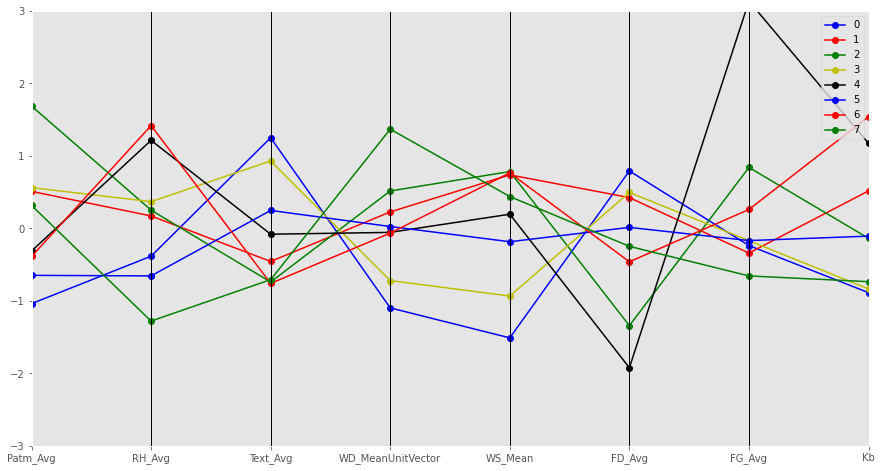

In [ ]:
parallel_plot(P)

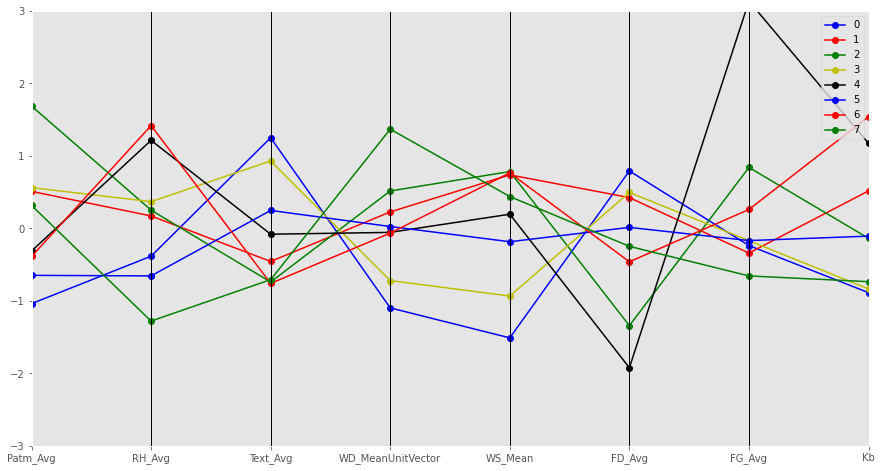